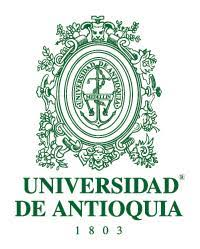

## **Miniproyecto 1 TDS3**

Mariana Noreña Vasquez

Carolina Jiménez Restrepo

**Tratamiento de señales III**
**2023-2**

## Librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io as sc
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descripción del análisis emocional

La emocion es un proceso psicofisiológico desencadenado por la percepción consciente y/o inconsciente de un objeto o situación y, a menudo, se asocia con el estado de ánimo, el temperamento, la personalidad, la disposición la motivación. Las emociones juegan un papel importante en la comunicación humana y pueden expresarse verbalmente a través del vocabulario emocional o mediante la expresión de señales no verbales como la entonación de la voz, las expresiones faciales y los gestos. La mayoría de los sistemas contemporaneos de interacción humano-computadora (HCI) son deficientes en la interpretación de esta informacipón y adolecen de una falta de inteligencia emocional. En otras palabras, no pueden identificar los estados emocionales humanos y utilizar esta
información para decidir las acciones adecuadas que ejecutar. El objetivo de la computación afectiva es llenar este vacío detectando senales emocionales que ocurren durante la interacción humano-computadora y sintetizando respuestas emocionales.

## Lectura de los datos y etiquetas

A continuación se hace la lectura de las cuatro bases de datos a las que se tiene acceso. Se pretende separar los datos de los labels para poder llevar a cabo un correcto análisis.

In [3]:
datosP1 = sc.loadmat('/content/drive/MyDrive/TDS3/Actividades/miniproyecto1/s14.mat')
datosP2 = sc.loadmat('/content/drive/MyDrive/TDS3/Actividades/miniproyecto1/s15.mat')
datosP3 = sc.loadmat('/content/drive/MyDrive/TDS3/Actividades/miniproyecto1/s16.mat')
datosP4 = sc.loadmat('/content/drive/MyDrive/TDS3/Actividades/miniproyecto1/s17.mat')

In [4]:
# Datos y labels paciente 1
signalsP1 = datosP1['data']
etiquetasP1 = datosP1['labels']

# Datos y labels paciente 2
signalsP2 = datosP2['data']
etiquetasP2 = datosP2['labels']

# Datos y labels paciente 3
signalsP3 = datosP3['data']
etiquetasP3 = datosP3['labels']

# Datos y labels paciente 4
signalsP4 = datosP4['data']
etiquetasP4 = datosP4['labels']

## Etiquetas emoción

A continuación se extraen las emociones asociadas a cada paciente dependendiendo de su nivel de valencia. Adicional a esto, se realiza una gráfica para cada uno acorde al arousal y al valence que presentan.

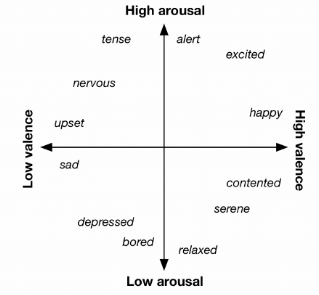

In [5]:
def PAD(labels):
  '''
    Esta función permite asignar a las etiquetas (labels) de la base de datos de cada paciente
    un nivel de referencia acorde a la valencia.
    Retorna una lista que contiene los niveles emocionales [0,1,2], la lista de arousal y valence.
  '''
  arousal = labels[:,1]
  valence = labels[:,0]
  emocion = np.zeros(np.size(arousal))
  emocion[valence<=4] = 0
  emocion[np.logical_and(valence>4 ,valence<=7)] = 1
  emocion[valence>7] = 2

  return emocion, arousal, valence

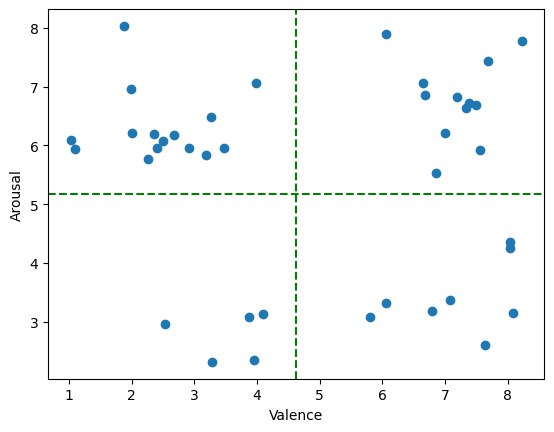

In [60]:
# Etiquetas de emoción para la persona 1

emocionP1, arousalP1, valenceP1 = PAD(etiquetasP1)

plt.scatter(valenceP1,arousalP1,)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='green', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='green', linestyle='--')

plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.show()



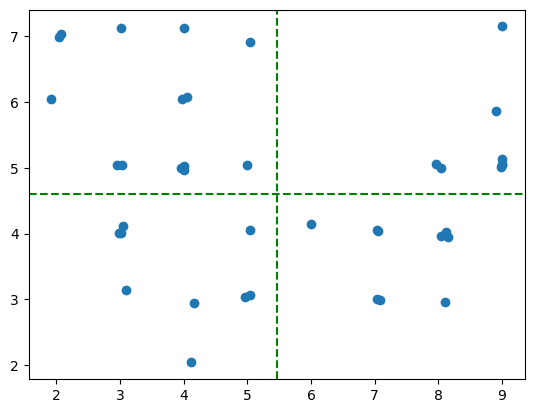

In [7]:
# Etiquetas de emoción para la persona 2

emocionP2, arousalP2, valenceP2 = PAD(etiquetasP2)

plt.scatter(valenceP2,arousalP2)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='green', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='green', linestyle='--')

plt.show()


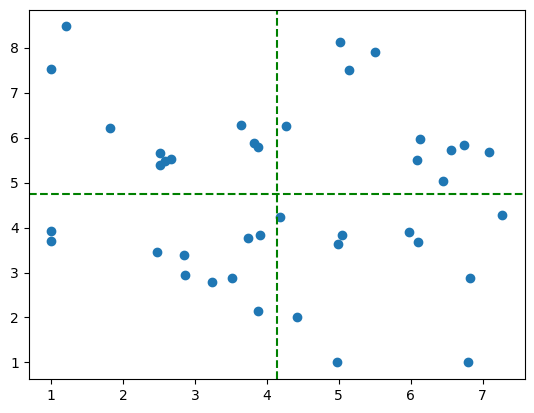

In [8]:
# Etiquetas de emoción para la persona 3

emocionP3, arousalP3, valenceP3 = PAD(etiquetasP3)

plt.scatter(valenceP3,arousalP3)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='green', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='green', linestyle='--')

plt.show()

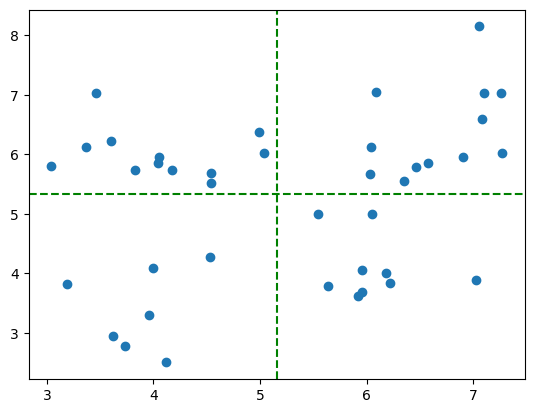

In [9]:
# Etiquetas de emoción para la persona 4

emocionP4, arousalP4, valenceP4 = PAD(etiquetasP4)

plt.scatter(valenceP4,arousalP4)

# Dibujar línea vertical en el punto medio del eje x
x_mid = (plt.xlim()[0] + plt.xlim()[1]) / 2
plt.axvline(x=x_mid, color='green', linestyle='--')

# Dibujar línea horizontal en el punto medio del eje y
y_mid = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axhline(y=y_mid, color='green', linestyle='--')

plt.show()

## Extracción y gráfica de las señales

En esta sección se gráfica para las cuatro personas las distintas señales respecto al comportamiento del primer video.

In [10]:
def graficas(x1,x2,x3,x4, name):
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  plt.plot(x1)
  plt.title(f'{name} 1')

  plt.subplot(2,2,2)
  plt.plot(x2)
  plt.title(f'{name} 2')

  plt.subplot(2,2,3)
  plt.plot(x3)
  plt.title(f'{name} 3')

  plt.subplot(2,2,4)
  plt.plot(x4)
  plt.title(f'{name} 4')

  plt.tight_layout()
  plt.show()

In [11]:
def normalizar(x):
  norm = (x-np.min(x))/(np.max(x)-np.min(x))
  return norm

### GSR

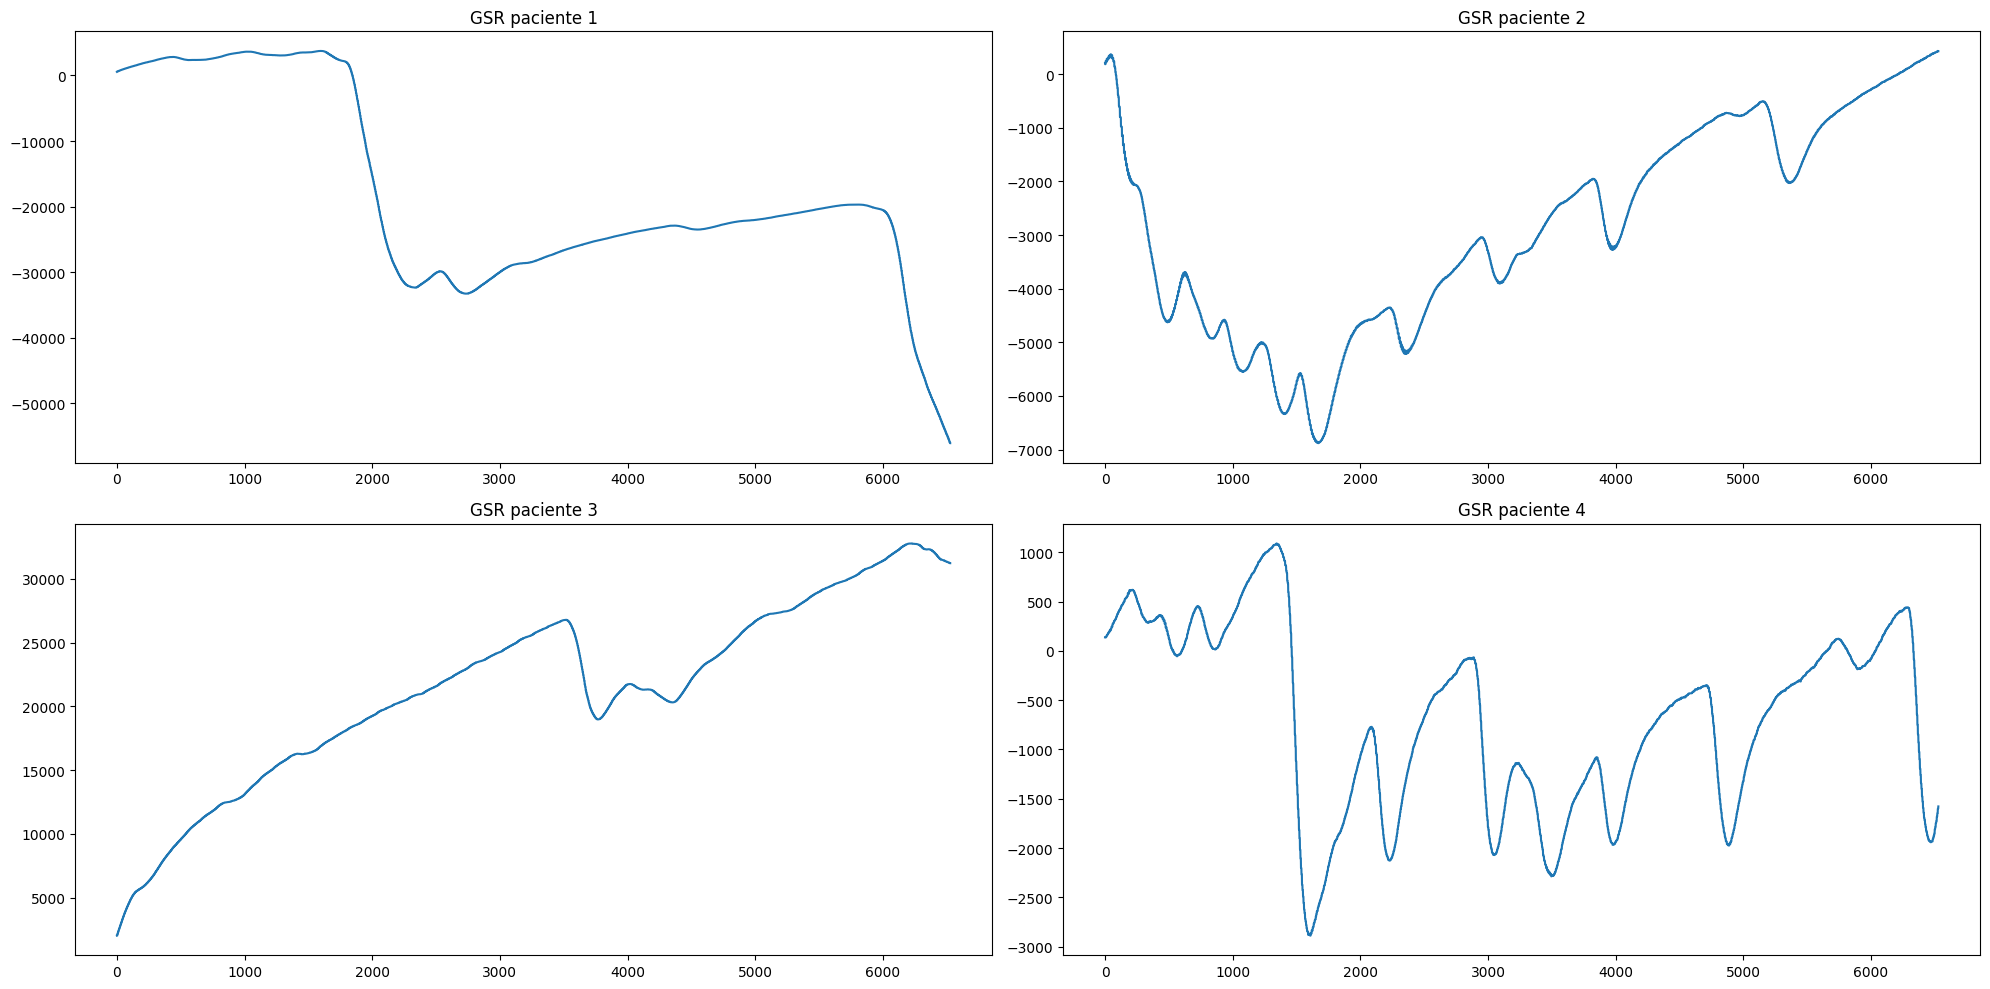

In [12]:
GSR1 = signalsP1[0,36,:]
GSR2 = signalsP2[0,36,:]
GSR3 = signalsP3[0,36,:]
GSR4 = signalsP4[0,36,:]

graficas(GSR1, GSR2, GSR3, GSR4, 'GSR paciente')


### Blood volume pressure

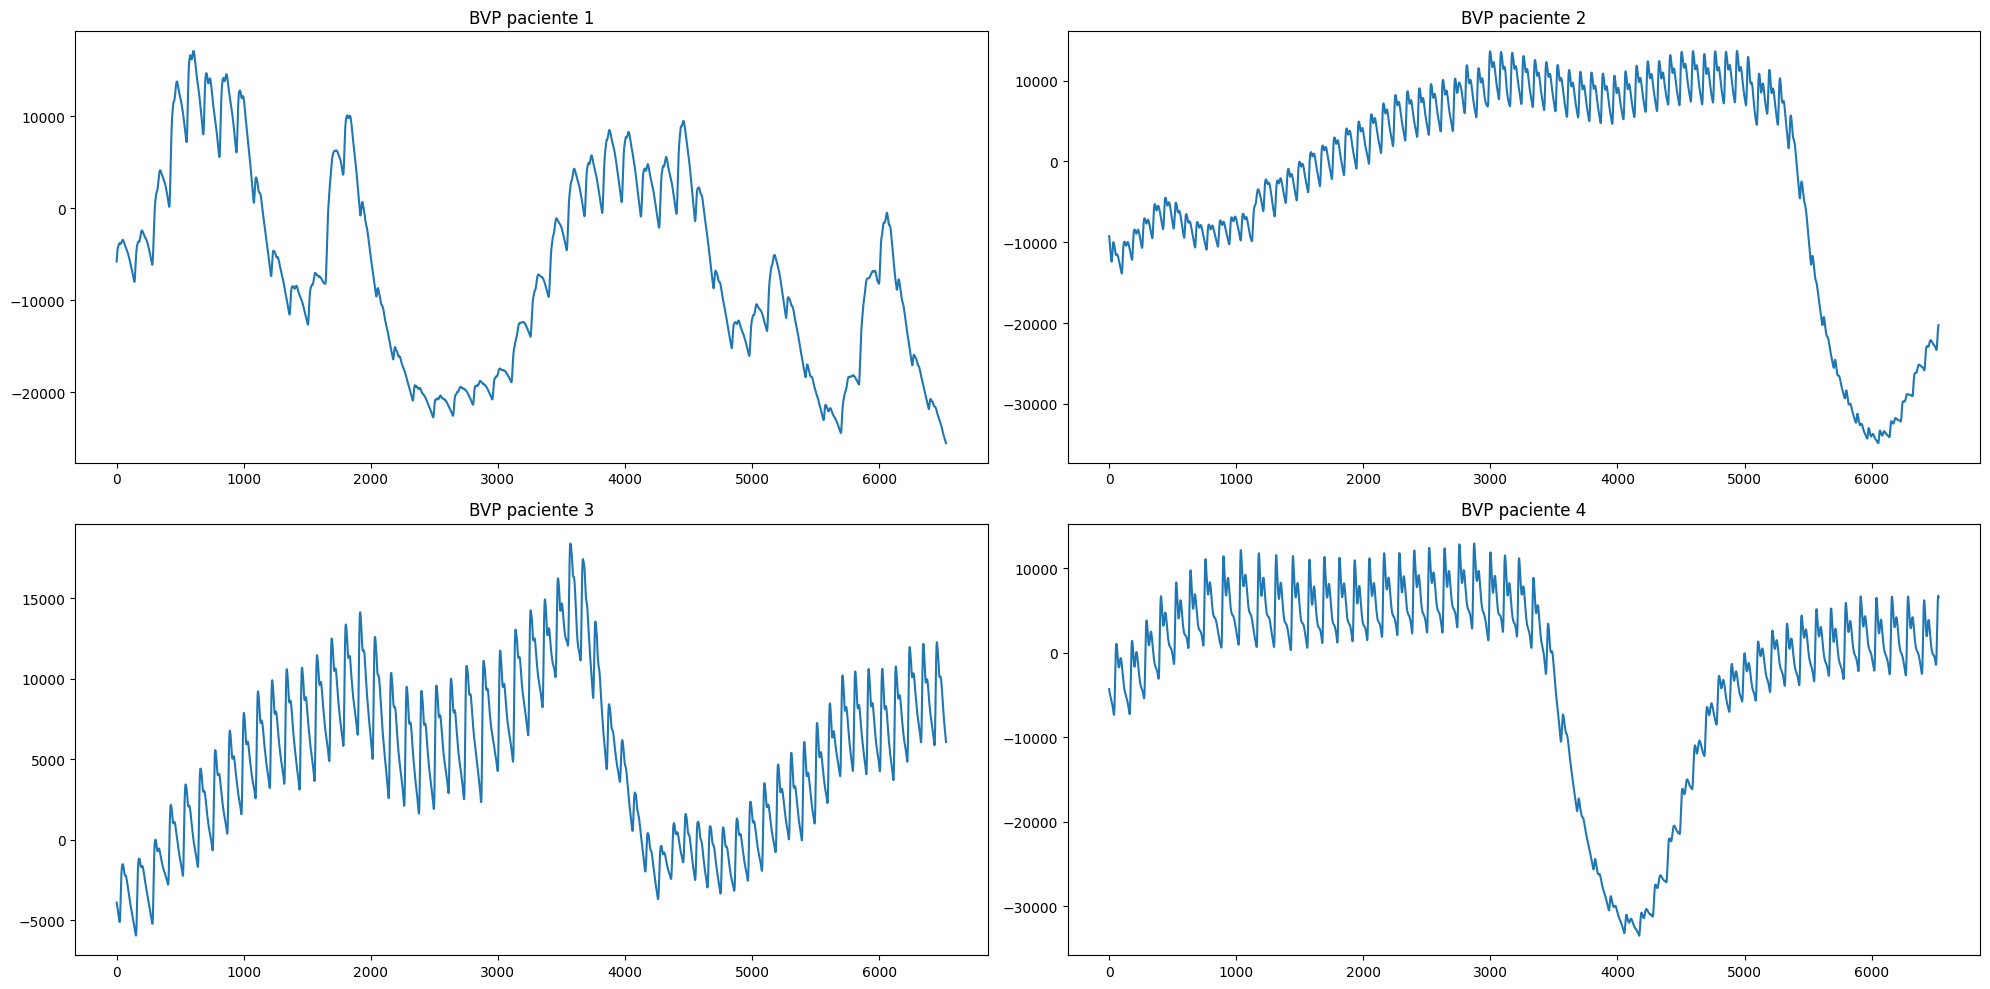

In [13]:
BVP1 = signalsP1[0,38,:]
BVP2 = signalsP2[0,38,:]
BVP3 = signalsP3[0,38,:]
BVP4 = signalsP4[0,38,:]

graficas(BVP1, BVP2, BVP3, BVP4, 'BVP paciente')

### Respiration pattern

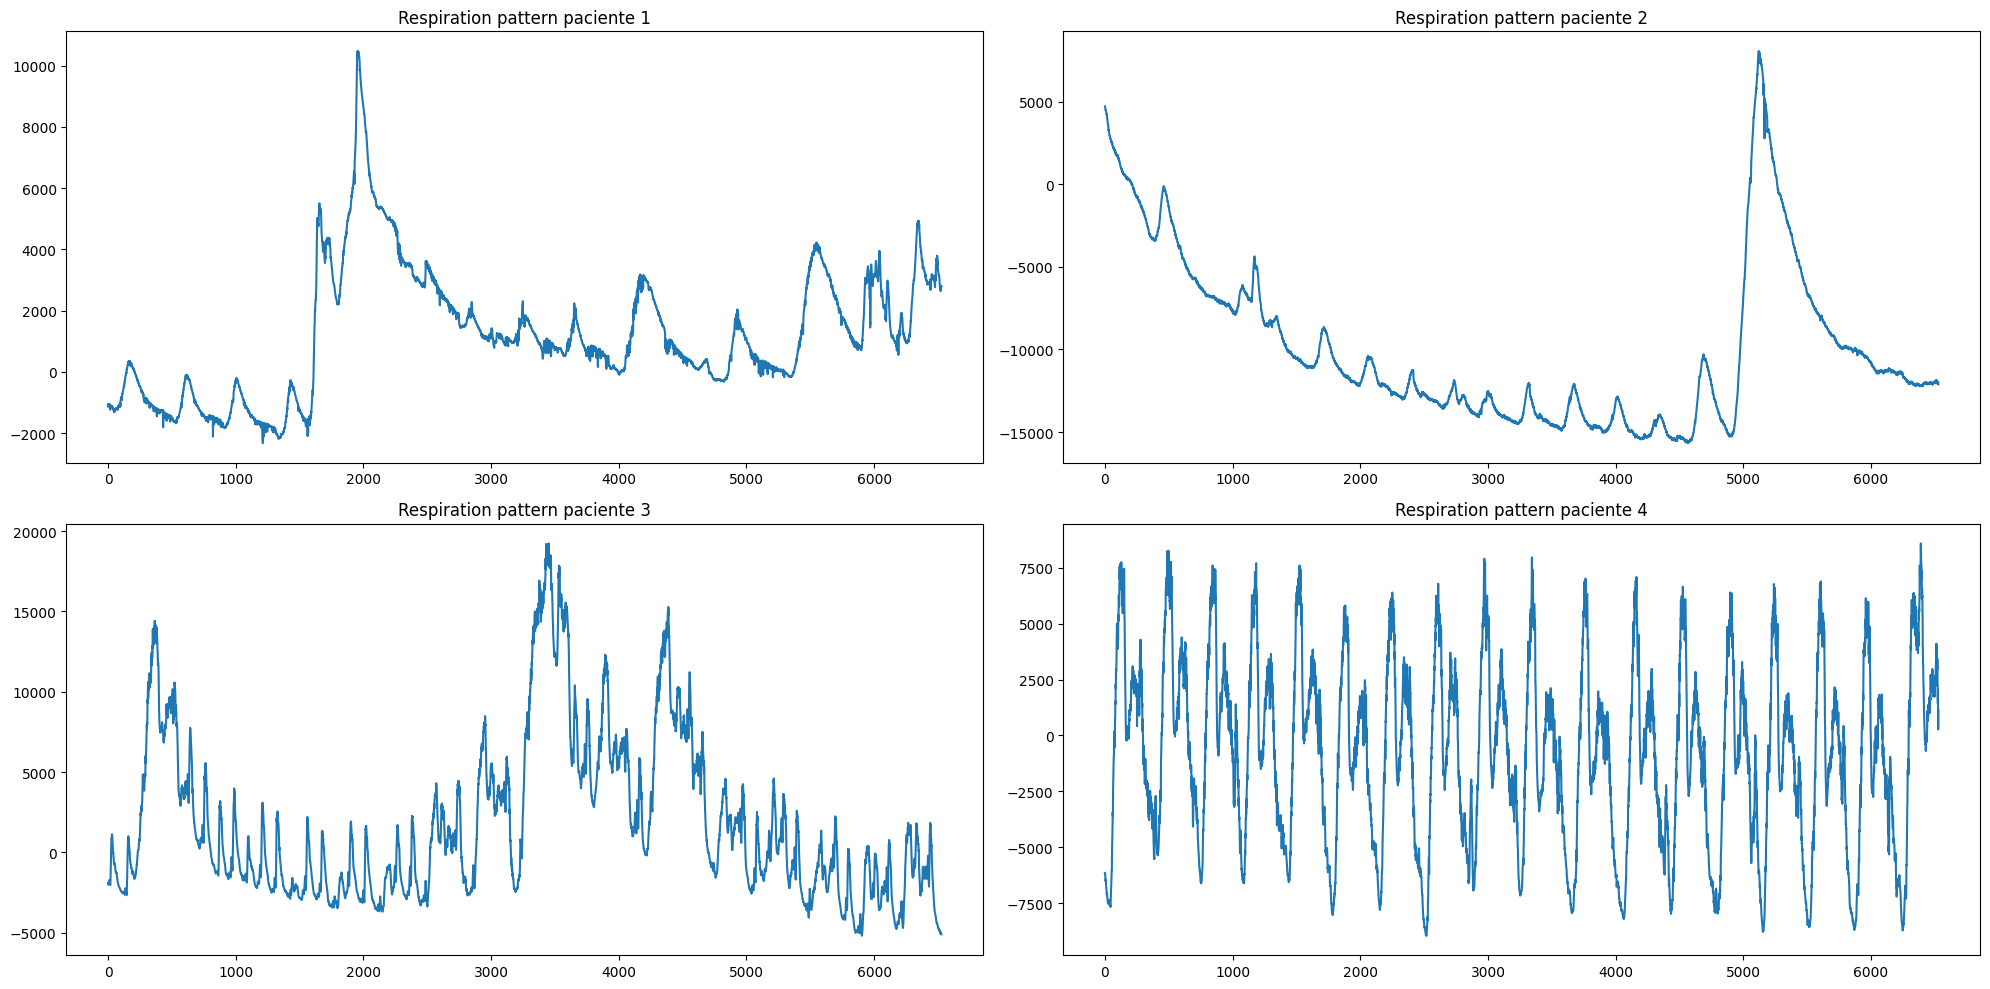

In [14]:
resp1 = signalsP1[0,37,:]
resp2 = signalsP2[0,37,:]
resp3 = signalsP3[0,37,:]
resp4 = signalsP4[0,37,:]

graficas(resp1, resp2, resp3, resp4, 'Respiration pattern paciente')

### Skin Temperature

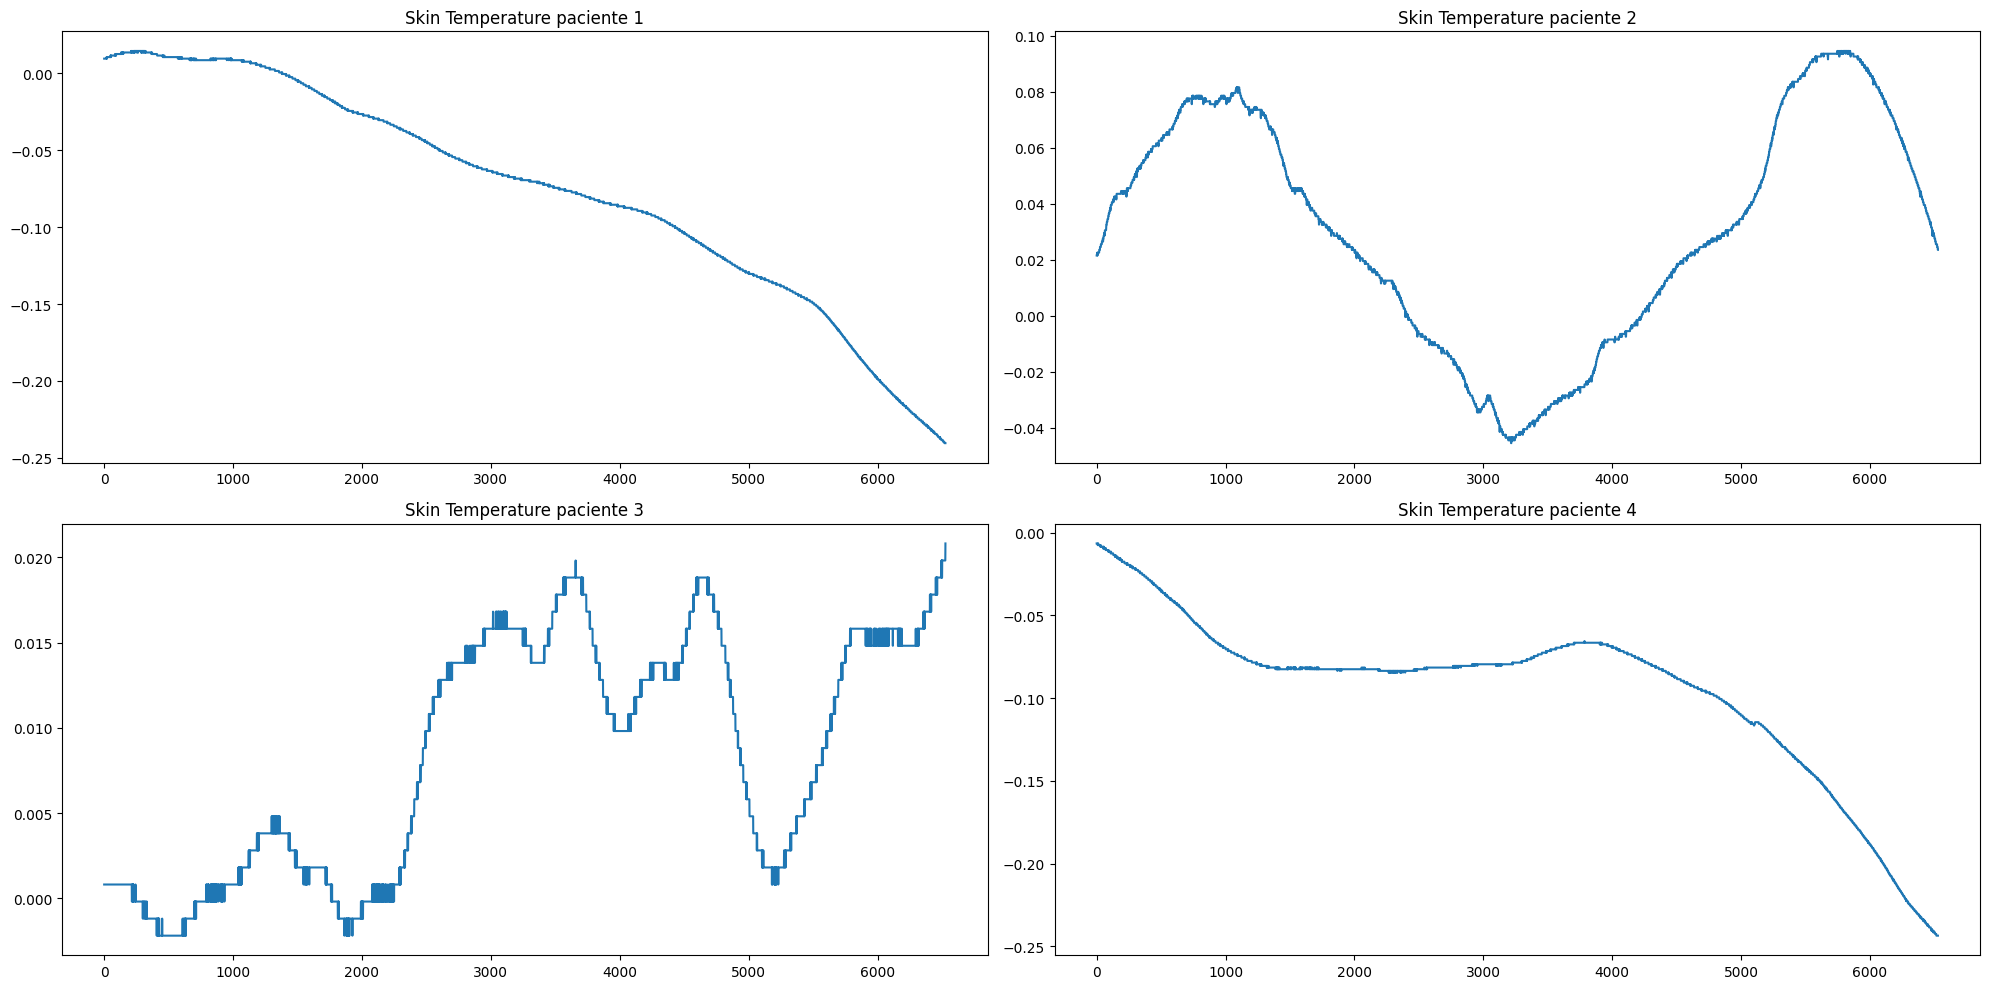

In [15]:
temp1 = signalsP1[0,39,:]
temp2 = signalsP2[0,39,:]
temp3 = signalsP3[0,39,:]
temp4 = signalsP4[0,39,:]

graficas(temp1, temp2, temp3, temp4, 'Skin Temperature paciente')

### EMG y EOG

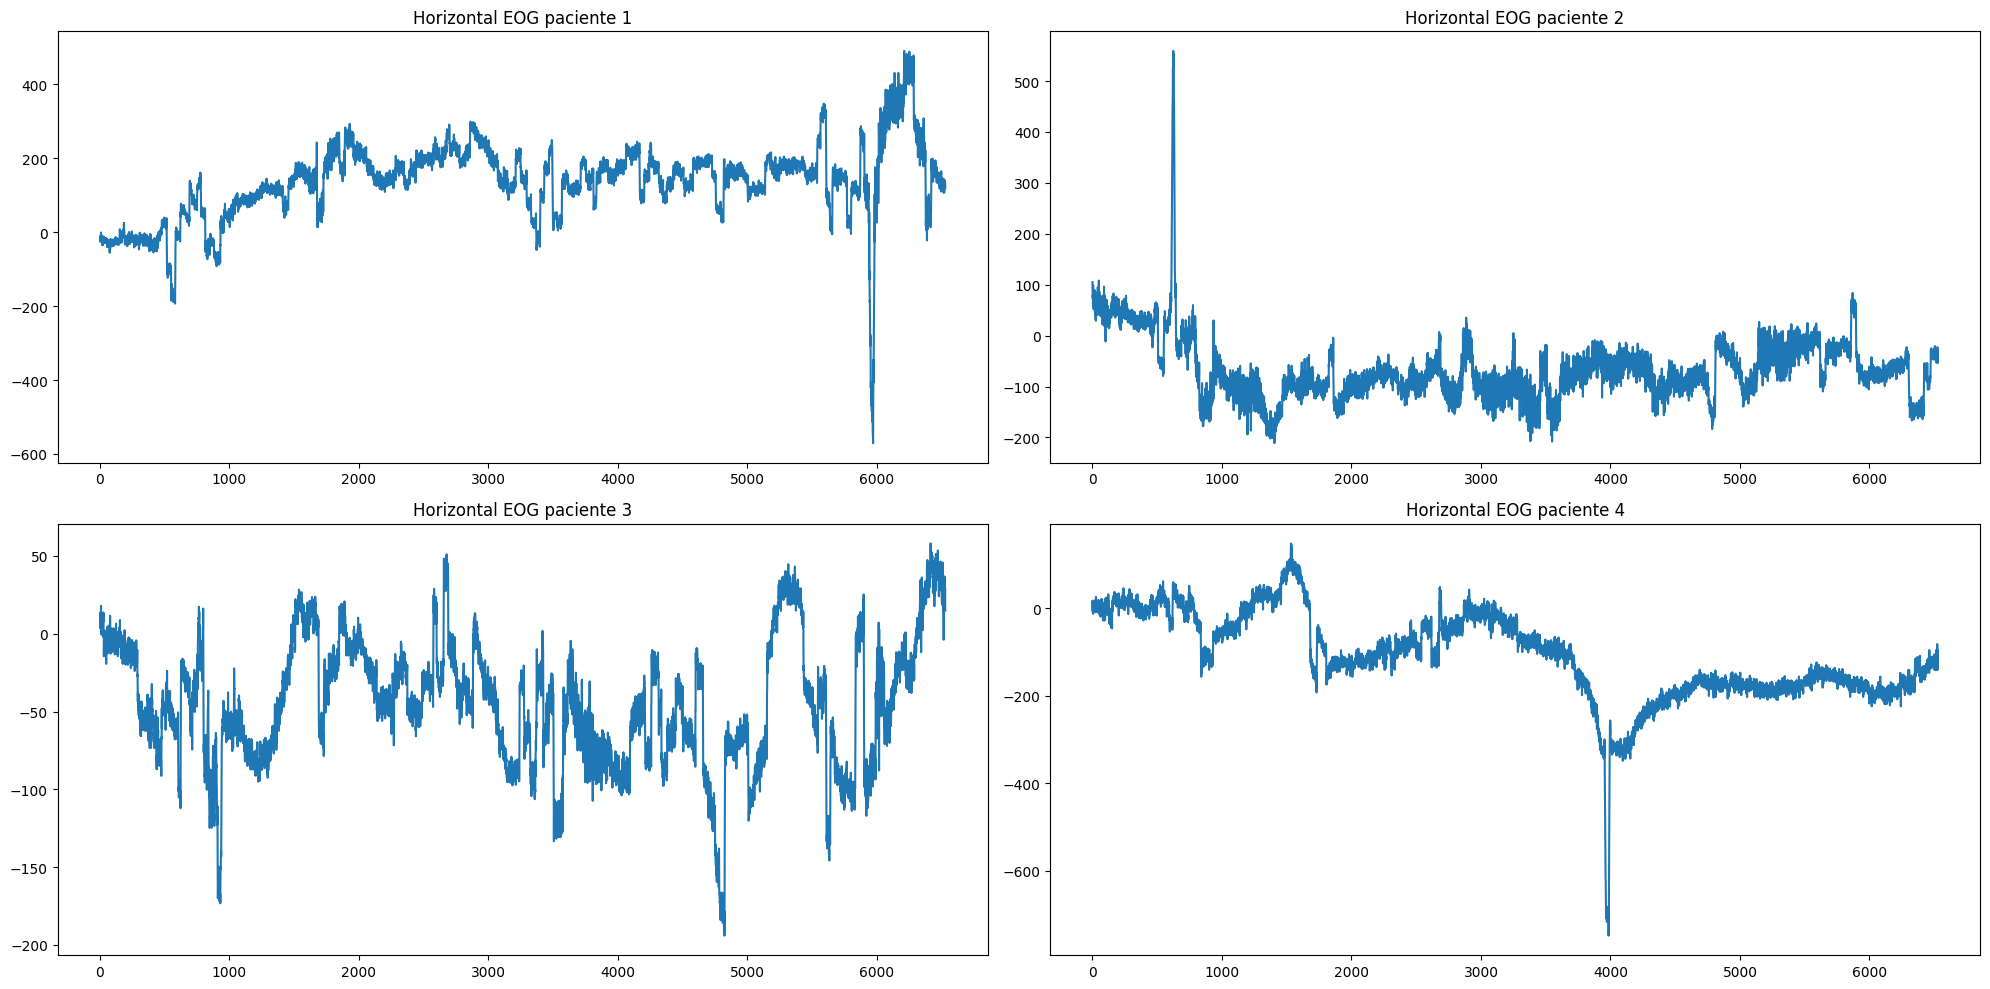

In [16]:
hEOG1 = signalsP1[0,32,:]
hEOG2 = signalsP2[0,32,:]
hEOG3 = signalsP3[0,32,:]
hEOG4 = signalsP4[0,32,:]

graficas(hEOG1, hEOG2, hEOG3, hEOG4, 'Horizontal EOG paciente')

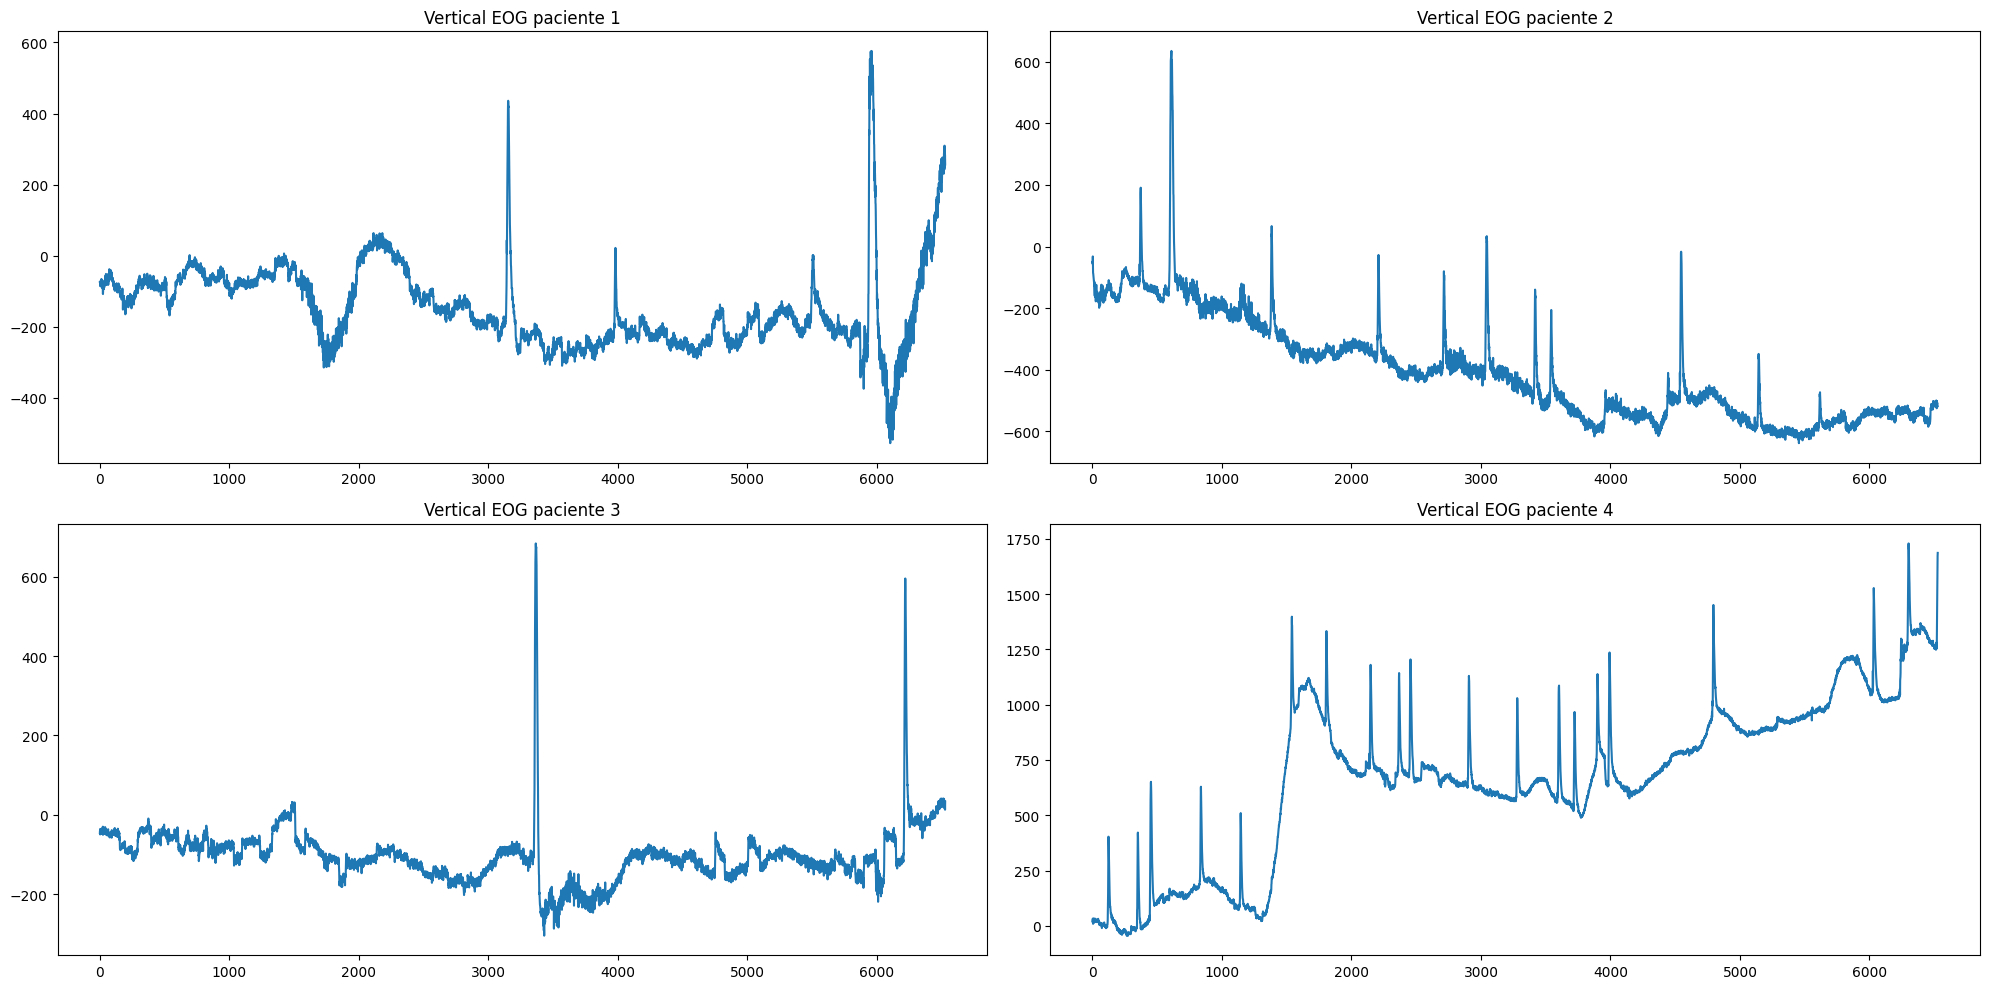

In [17]:
vEOG1 = signalsP1[0,33,:]
vEOG2 = signalsP2[0,33,:]
vEOG3 = signalsP3[0,33,:]
vEOG4 = signalsP4[0,33,:]

graficas(vEOG1, vEOG2, vEOG3, vEOG4, 'Vertical EOG paciente')

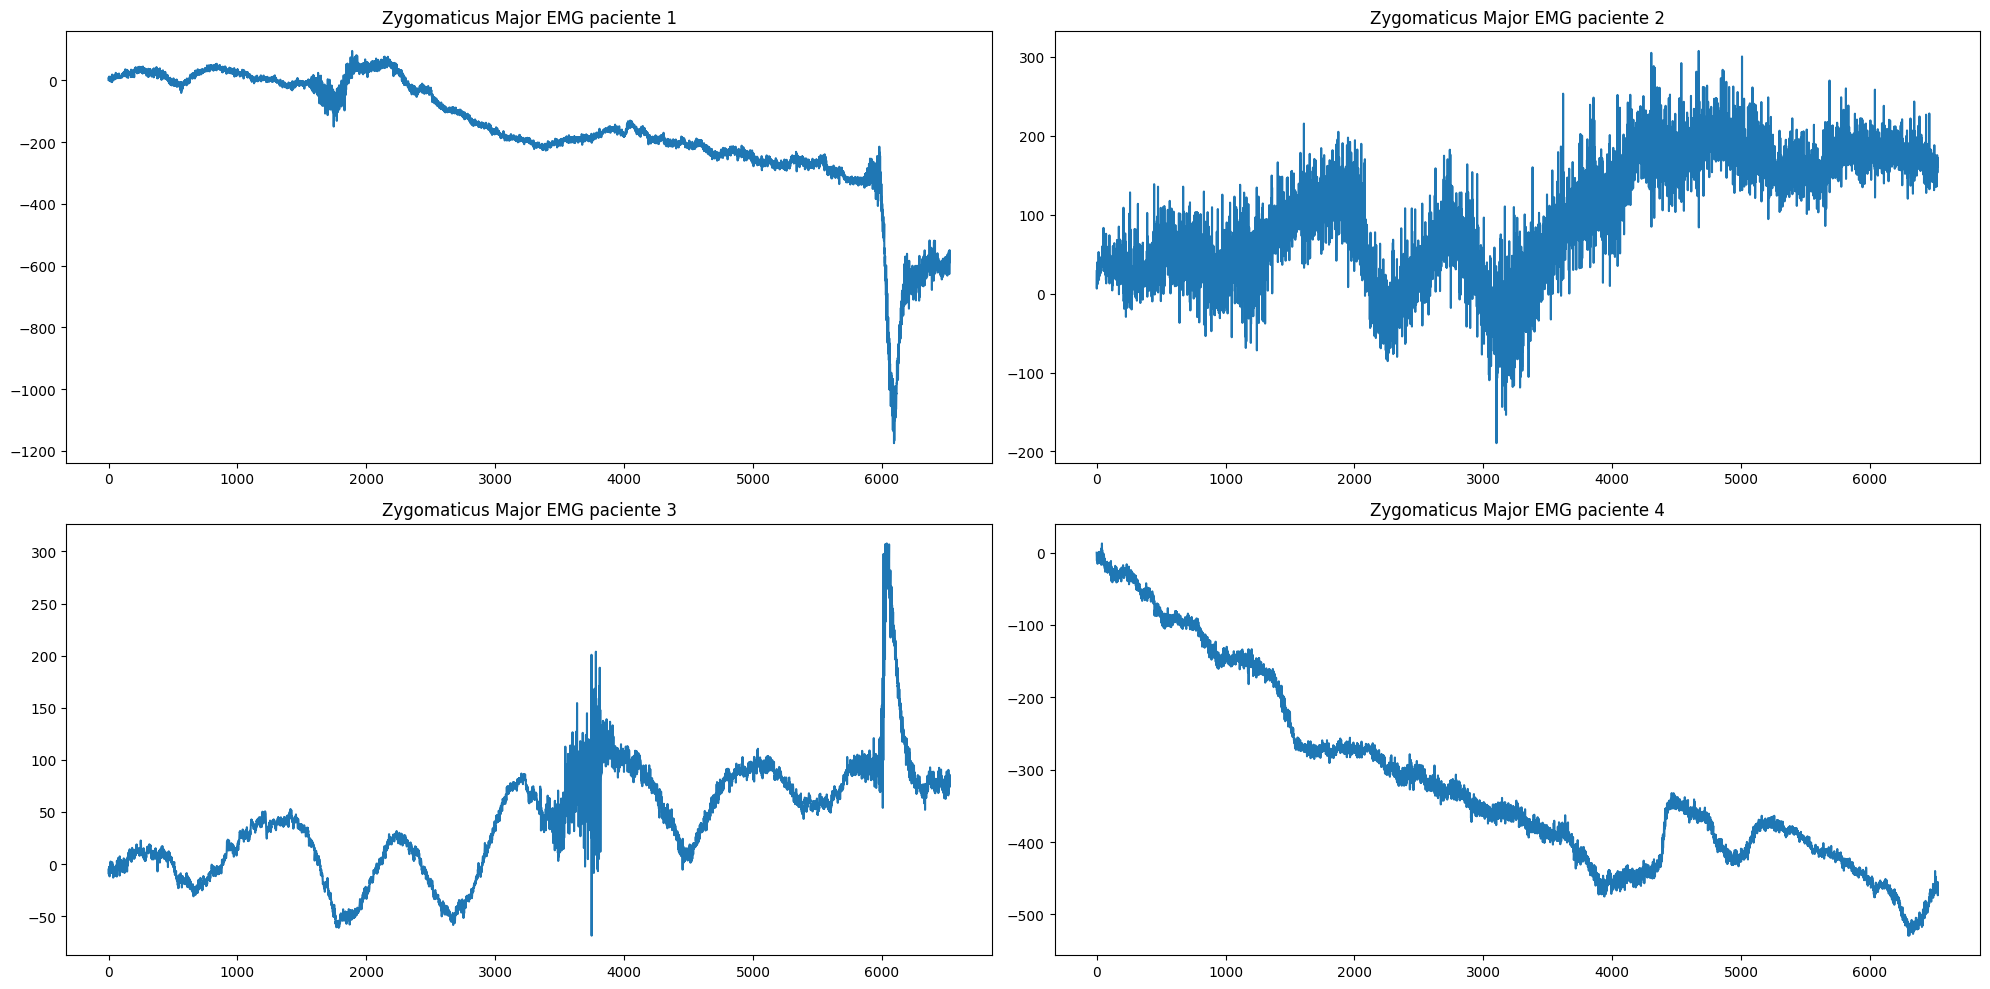

In [18]:
#Mejillas
zEMG1 = signalsP1[0,34,:]
zEMG2 = signalsP2[0,34,:]
zEMG3 = signalsP3[0,34,:]
zEMG4 = signalsP4[0,34,:]

graficas(zEMG1, zEMG2, zEMG3, zEMG4, 'Zygomaticus Major EMG paciente')

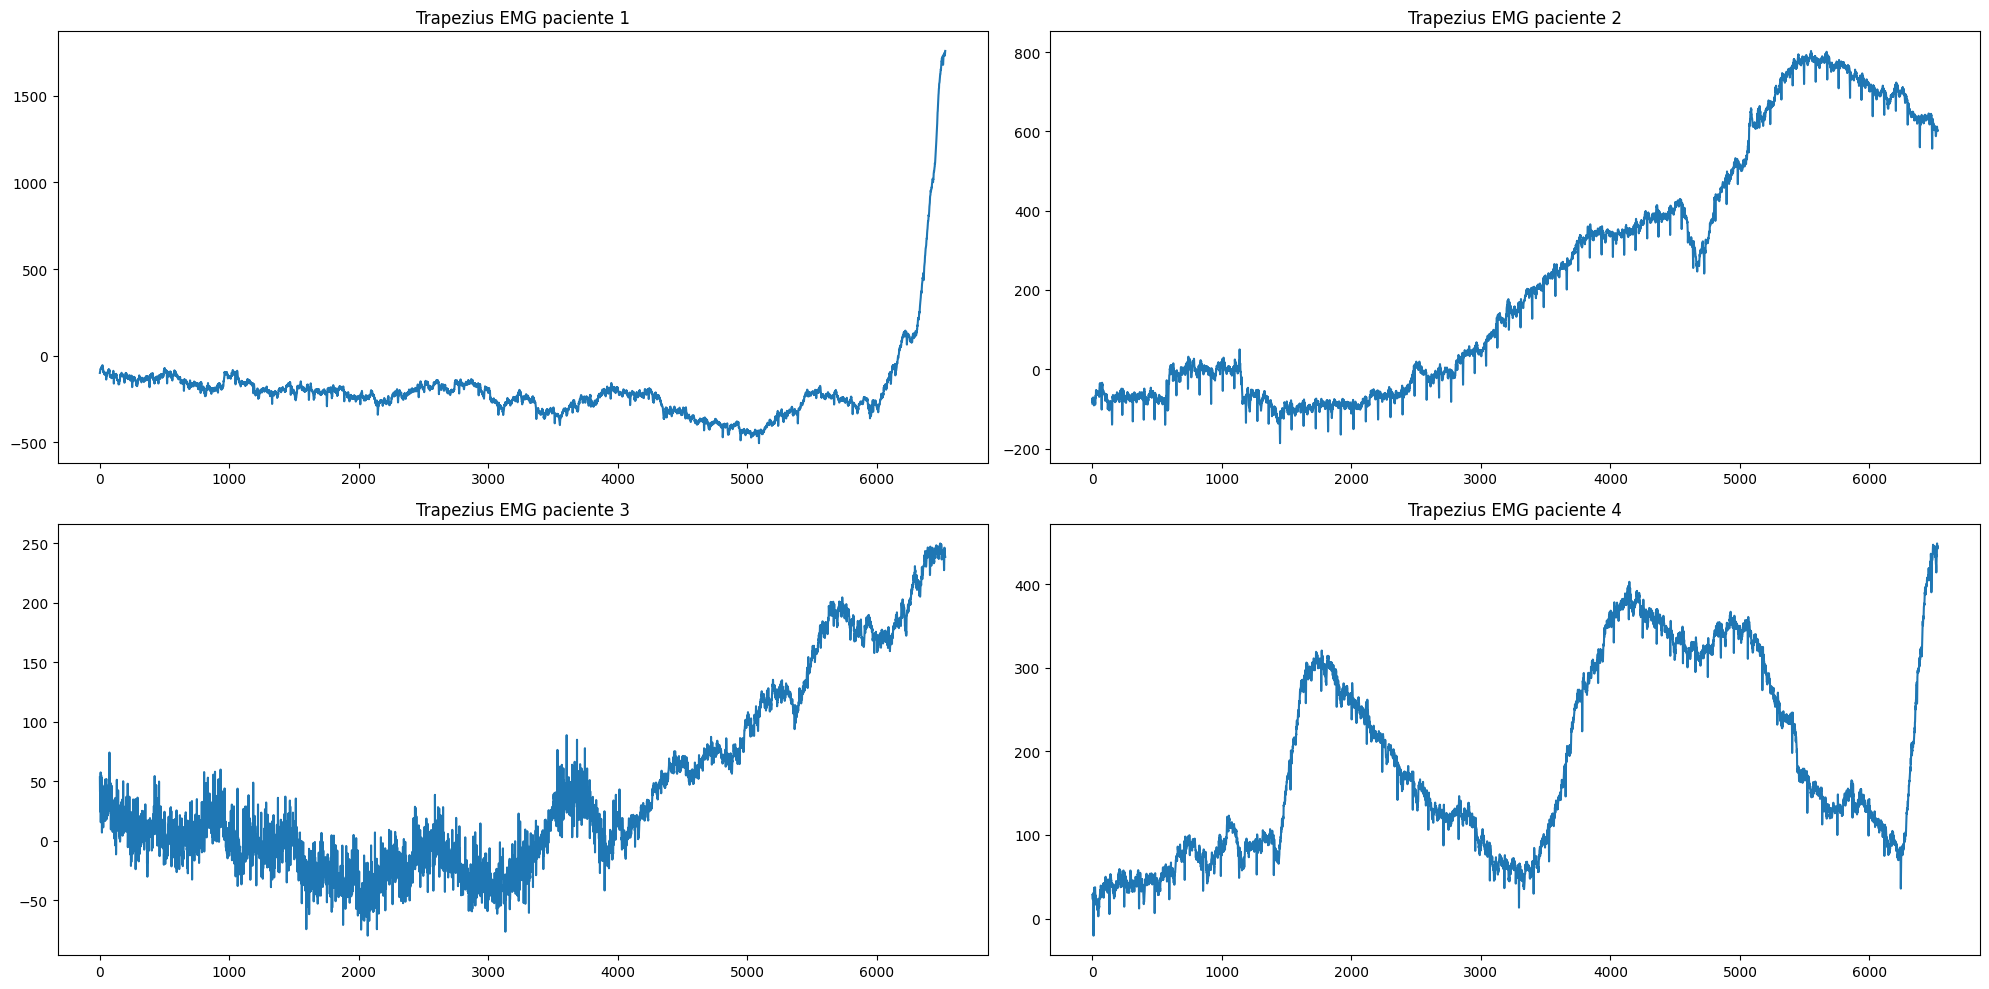

In [19]:
## Espalda
tEMG1 = signalsP1[0,35,:]
tEMG2 = signalsP2[0,35,:]
tEMG3 = signalsP3[0,35,:]
tEMG4 = signalsP4[0,35,:]

graficas(tEMG1, tEMG2, tEMG3, tEMG4, 'Trapezius EMG paciente')

## Extracción de características

In [20]:
def spectralP(x, fs, order, cutoff, bandType):

  #10 potencias espectrales en el rango de 0 a 2.4HZ
  b, a = scipy.signal.butter(order, cutoff/fs, btype=bandType, analog=False)
  filtrada = scipy.signal.lfilter(b, a, x)
  signal2 = np.fft.fft(filtrada)

  potencia = np.abs(signal2)**2
  frecuencias = np.fft.fftfreq(len(signal2), 1.0/fs)
  indices = np.where((frecuencias >= 0.) & (frecuencias <= cutoff))[0]
  indicesO = np.argsort(np.abs(potencia[indices]))[::-1]

  espectro_banda = potencia[indicesO][:10]
  freqs = frecuencias[indicesO][:10]
  return espectro_banda, freqs

In [21]:
def caracteristicas(signal, pos, op):
  '''
    Función que se encarga de extraer las características de las señales GSR, blood pressure,
    respiration pattern, skin temperatura, EOG, EMG, EEG.

    Retorna un vector vertical con las características de una misma señal para cada de las
    personas.
  '''

  vector1 = []
  vector2 = []
  vector3 = []
  vector4 = []

  if op == '1': #GSR
    for i in range(0,40):
      vector1.append(caracteristicas_gsr(signal[0][i,pos,:],128))
      vector2.append(caracteristicas_gsr(signal[1][i,pos,:],128))
      vector3.append(caracteristicas_gsr(signal[2][i,pos,:],128))
      vector4.append(caracteristicas_gsr(signal[3][i,pos,:],128))
  elif op == '2': #blood
    for i in range(0,40):
      vector1.append(caracteristicas_blood(signal[0][i,pos,:],128))
      vector2.append(caracteristicas_blood(signal[1][i,pos,:],128))
      vector3.append(caracteristicas_blood(signal[2][i,pos,:],128))
      vector4.append(caracteristicas_blood(signal[3][i,pos,:],128))
  elif op == '3': #respiration
      for i in range(0,40):
        vector1.append(caracteristicas_resp(signal[0][i,pos,:],128))
        vector2.append(caracteristicas_resp(signal[1][i,pos,:],128))
        vector3.append(caracteristicas_resp(signal[2][i,pos,:],128))
        vector4.append(caracteristicas_resp(signal[3][i,pos,:],128))
  elif op == '4': #skin
    for i in range(0,40):
      vector1.append(caracteristicas_skin(signal[0][i,pos,:],128))
      vector2.append(caracteristicas_skin(signal[1][i,pos,:],128))
      vector3.append(caracteristicas_skin(signal[2][i,pos,:],128))
      vector4.append(caracteristicas_skin(signal[3][i,pos,:],128))
  elif op == '5': #EOG - EMG
    for i in range(0,40):
      vector1.append(caracteristicas_eog_emg(signal[0][i,pos,:]))
      vector2.append(caracteristicas_eog_emg(signal[1][i,pos,:]))
      vector3.append(caracteristicas_eog_emg(signal[2][i,pos,:]))
      vector4.append(caracteristicas_eog_emg(signal[3][i,pos,:]))
  else: # EEG
    for i in range(0,40):
      vector1.append(caracteristicas_eeg(signal[0][i,pos,:]))
      vector2.append(caracteristicas_eeg(signal[1][i,pos,:]))
      vector3.append(caracteristicas_eeg(signal[2][i,pos,:]))
      vector4.append(caracteristicas_eeg(signal[3][i,pos,:]))

  return np.vstack([vector1, vector2, vector3, vector4])

In [22]:
def caracteristicas_gsr(x, fs):
  '''
      Función que se encarga de extraer las siguientes características de la señal GSR:
     - Media de la señal
     - Proporción de las muestras negativas de la derivada respecto a las totales
     - 10 potencias espectrales y las frecuencias asociadas en el rango de 0 a 2.4Hz

      Retorna una lista con las características extraidas.
  '''

  gsrMean = x.mean() #Promedio de la respuesta galvánica

  gsrDerivative = np.diff(x) #Derivada de la GSR
  gsrPropNA = np.sum(gsrDerivative < 0) /len(x) #Proporción de las muestras negativas de la derivada respecto a las muestras totales

  # 10 potencias espectrales y las frecuencias
  powers, freqs = spectralP(x, fs, 4, 2.4, 'lowpass')

  array = [gsrMean, gsrPropNA]
  for i in range(0,10):
    array.append(powers[i])
  for j in range(0,10):
    array.append(freqs[j])

  return array

In [23]:
def caracteristicas_blood(x, fs):
  '''
      Función que se encarga de extraer las características de la señal de presión sanguínea:
      - La media de la señal
      - La desviación estándar
      - La relación de energía en las bandas [0.04, 0.15] y [0.15, 0.5]

      Retorna una lista con las características
  '''
  #Promedio de la señal de la presión sanguínea
  bloodMean = np.mean(x)
  #Desviación estándar de la señal de la presión sanguínea
  bloodSTD = np.std(x)

  #Relación de energía en las bandas de frecuencia [0.04, 0.15] y [0.15, 0.5]

  b, a = scipy.signal.butter(4, [0.04/fs, 0.5/fs], btype='band', analog=False) #Filtro pasabanda
  filtrada = scipy.signal.lfilter(b, a, x)

  signal2 = np.fft.fft(filtrada)
  potencia = np.abs(signal2)**2
  freqs= np.fft.fftfreq(len(signal2), 1.0/fs)

  indicesBL = np.where((freqs >= 0.04) & (freqs <= 0.15))[0]
  indicesHL = np.where((freqs > 0.15) & (freqs <= 0.5))[0]

  ratioE = np.sum(potencia[indicesBL])/np.sum(potencia[indicesHL])

  return np.array([bloodMean, bloodSTD, ratioE])

In [24]:
def caracteristicas_resp(x, fs):
  '''
    Función que extrae las características  del patrón de respiración:
    - La media
    - La desviación estándar de la derivada
    - 10 potencias espectrales y las frecuencias asociadas en el rango de 0 a 2.4Hz

    Retorna una lista con las características
  '''

  #Promedio de la señal de respiración
  respMean = np.mean(x)

  #Promedio de la derivada de la señal de respiración
  respDerivative = np.diff(x) #Derivative
  respDMean = np.mean(respDerivative)

  #10 potencias espectrales en la banda 0 a 2.4Hz
  powers, freqs = spectralP(x, fs, 4, 2.4, 'lowpass')

  array = [respMean, respDMean]

  for i in range(0,10):
    array.append(powers[i])
  for j in range(0,10):
    array.append(freqs[j])

  return array

In [25]:
def caracteristicas_skin(x, fs):
  '''
    Función que extrae las características  de la temperatura de la piel:
    - La media
    - Promedio de la derivada
    - 10 potencias espectrales y las frecuencias asociadas en el rango de 0 a 2.4Hz


    Retorna una lista con las características
  '''
  #Promedio de la señal
  skintMean = np.mean(x)

  #Promedio de la derivada
  skintDerivative = np.diff(x) #Derivada
  skintDMean = np.mean(skintDerivative) #Media

  #Potencia espectral en [0,0.1] y [0.1,0.2]

  b, a = scipy.signal.butter(4, 0.2/fs, btype='lowpass', analog=False)
  filtrada = scipy.signal.lfilter(b, a, x)

  signal2 = np.fft.fft(filtrada)
  potencia = np.abs(signal2)**2
  freqs= scipy.fft.fftfreq(len(signal2), 1.0/fs)

  indicesBL = np.where((freqs >= 0.) & (freqs <= 0.1))[0]
  indicesHL = np.where((freqs > 0.1) & (freqs <= 0.2))[0]

  potencia_LB = np.sum(potencia[indicesBL])/len(x)/fs
  potencia_HB = np.sum(potencia[indicesHL])/len(x)/fs


  return np.array([skintMean, skintDMean, potencia_LB, potencia_HB])

In [26]:
def caracteristicas_eog_emg(x):
  '''
    Función que extrae las características  de las señales EOG y EMG:
    - La media
    - La desviación
    - Energía de la señal

    Retorna una lista con las características
  '''

  #Media
  media = np.mean(x)

  #Desviación estándar
  desviacionS = np.std(x)

  #Energía de la señal
  energia = np.sum(i**2 for i in x)

  return np.array([media, desviacionS, energia])

In [27]:
def caracteristicas_eeg(x, fs=128):
  # O1 (15), O2(17)
  # C3 (8), C4 (23)
  # F7 (3), F8 (28)
  # T7 (7), T8 (24)
  # P3 (12), P4 (19)

  # Característica Alpha (8 - 12Hz)
  bA, aA = scipy.signal.butter(4, [8/fs, 12/fs], btype='band', analog=False) #Filtro pasabanda
  filtradaA = scipy.signal.lfilter(bA, aA, x)

  signal2 = np.fft.fft(filtradaA)
  potencia = np.abs(signal2)**2
  freqs= np.fft.fftfreq(len(signal2), 1.0/fs)

  indicesAL = np.where((freqs >= 8) & (freqs <= 12))[0]
  potencia_AL = np.sum(potencia[indicesAL])/len(x)/fs

  # Característica Beta (12 - 30Hz) -----------------------------
  bB, aB = scipy.signal.butter(4, [12/fs, 30/fs], btype='band', analog=False) #Filtro pasabanda
  filtradaA = scipy.signal.lfilter(bB, aB, x)

  signal2 = np.fft.fft(filtradaA)
  potencia = np.abs(signal2)**2
  freqs= np.fft.fftfreq(len(signal2), 1.0/fs)

  indicesBE = np.where((freqs >= 12) & (freqs <= 30))[0]
  potencia_BE = np.sum(potencia[indicesBE])/len(x)/fs

  # Característica Gamma (30 - 100Hz) ----------------------------
  bG, aG = scipy.signal.butter(4, [30/fs, 100/fs], btype='band', analog=False) #Filtro pasabanda
  filtradaA = scipy.signal.lfilter(bG, aG, x)

  signal2 = np.fft.fft(filtradaA)
  potencia = np.abs(signal2)**2
  freqs= np.fft.fftfreq(len(signal2), 1.0/fs)

  indicesG = np.where((freqs >= 30) & (freqs <= 100))[0]
  potencia_G = np.sum(potencia[indicesG])/len(x)/fs


  return np.array([potencia_AL, potencia_BE, potencia_G])

In [28]:
vectorGSR = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 36, '1')
vectorBlood = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 38, '2')
vectorResp = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 37, '3')
vectorSkin = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 39, '4')

vectorHEOG = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 32, '5')
vectorVEOG = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 33, '5')
vectorzEMG = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 34, '5')
vectortEMG = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 35, '5')

vectorEEG_O1 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 15, '6')
vectorEEG_O2 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 17, '6')
vectorEEG_C3 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 8, '6')
vectorEEG_C4 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 23, '6')
vectorEEG_F7 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 3, '6')
vectorEEG_F8 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 28, '6')
vectorEEG_T7 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 7, '6')
vectorEEG_T8 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 24, '6')
vectorEEG_P3 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 12, '6')
vectorEEG_P4 = caracteristicas([signalsP1, signalsP2, signalsP3, signalsP4], 19, '6')

<ipython-input-26-65a9a9d836f1>:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  energia = np.sum(i**2 for i in x)


## Dataframe de características

In [29]:
nombre = ['Promedio GSR', 'Proporción muestras negativas GSR', 'Potencia 1 GSR', 'Potencia 2 GSR', 'Potencia 3 GSR', 'Potencia 4 GSR', 'Potencia 5 GSR', 'Potencia 6 GSR',
          'Potencia 7 GSR', 'Potencia 8 GSR', 'Potencia 9 GSR', 'Potencia 10 GSR', 'Freq 1 GSR', 'Freq 2 GSR', 'Freq 3 GSR', 'Freq 4 GSR', 'Freq 5 GSR', 'Freq 6 GSR',
          'Freq 7 GSR', 'Freq 8 GSR', 'Freq 9 GSR', 'Freq 10 GSR', 'Promedio PS', 'Desviación E PS', 'Relación Energía PS', 'Promedio Resp', 'Desviación E Resp', 'Potencia 1 Resp',
          'Potencia 2 Resp', 'Potencia 3 Resp', 'Potencia 4 Resp', 'Potencia 5 Resp', 'Potencia 6 Resp', 'Potencia 7 Resp', 'Potencia 8 Resp', 'Potencia 9 Resp', 'Potencia 10 Resp',
          'Freq 1 Resp', 'Freq 2 Resp', 'Freq 3 Resp', 'Freq 4 Resp', 'Freq 5 Resp', 'Freq 6 Resp', 'Freq 7 Resp', 'Freq 8 Resp', 'Freq 9 Resp', 'Freq 10 Resp',
          'Promedio Skin', 'Promedio Derivada Skin', 'Potencial espectral Skin [0-0.1]', 'Potencial espectral Skin [0.1-0.2]', 'Promedio HEOG', 'Desviación HEOG', 'Energía HEOG',
          'Promedio VEOG', 'Desviación VEOG', 'Energía VEOG', 'Promedio zEMG', 'Desviación zEMG', 'Energía zEMG', 'Promedio tEMG', 'Desviación tEMG', 'Energía tEMG',
          'Pot Alpha O1', 'Pot Beta O1', 'Pote Gamma O1', 'Pot Alpha O2', 'Pot Beta O2', 'Pote Gamma O2', 'Pot Alpha C3', 'Pot Beta C3', 'Pote Gamma C3',
          'Pot Alpha C4', 'Pot Beta C4', 'Pote Gamma C4', 'Pot Alpha F7', 'Pot Beta F7', 'Pote Gamma F7', 'Pot Alpha F8', 'Pot Beta F8', 'Pote Gamma F8',
          'Pot Alpha T7', 'Pot Beta T7', 'Pote Gamma T7', 'Pot Alpha T8', 'Pot Beta T8', 'Pote Gamma T8', 'Pot Alpha P3', 'Pot Beta P3', 'Pote Gamma P3',
          'Pot Alpha P4', 'Pot Beta P4', 'Pote Gamma P4']

vectorC = np.hstack([vectorGSR, vectorBlood, vectorResp, vectorSkin, vectorHEOG, vectorVEOG, vectorzEMG, vectortEMG, vectorEEG_O1, vectorEEG_O2, vectorEEG_C3, vectorEEG_C4,
                    vectorEEG_F7, vectorEEG_F8, vectorEEG_T7, vectorEEG_T8, vectorEEG_P3, vectorEEG_P4])

dataCaracteristicas = pd.DataFrame(vectorC)
dataCaracteristicas.columns = nombre

In [30]:
emociones = np.vstack([np.array(emocionP1), np.array(emocionP2), np.array(emocionP3), np.array(emocionP4)])
emociones = emociones.ravel()

dataCaracteristicas['Emociones'] = emociones
dataCaracteristicas['Emociones'] = dataCaracteristicas['Emociones'].astype('category')
dataCaracteristicas

Promedio GSR  Proporción muestras negativas GSR  Potencia 1 GSR  \
0   -18005.683435                           0.175092    1.324827e+16   
1    -8794.650746                           0.123315    3.182187e+15   
2    -1331.408630                           0.127911    1.050701e+14   
3     3491.283824                           0.104167    5.152051e+14   
4    -3736.386024                           0.179228    5.783107e+14   
..            ...                                ...             ...   
155   5204.994820                           0.064951    1.128307e+15   
156   2975.633960                           0.075061    3.614324e+14   
157   7866.527529                           0.050092    2.563724e+15   
158  -2334.049943                           0.172028    2.283602e+14   
159     57.065275                           0.120711    1.793668e+13   

     Potencia 2 GSR  Potencia 3 GSR  Potencia 4 GSR  Potencia 5 GSR  \
0      1.820018e+15    1.299195e+15    2.999675e+14    1.554577e+14   
1      9.641417e+14    4.038839e+14    8.747527e+13    4.359242e+13   
2      7.772538e+13    1.064465e+13    2.104828e+12    1.218868e+12   
3      1.948242e+14    3.587921e+13    2.175470e+13    1.335715e+13   
4      1.654693e+14    2.956190e+13    2.066541e+13    1.884779e+13   
..              ...             ...             ...             ...   
155    3.685589e+13    1.851494e+13    1.013025e+13    8.734048e+12   
156    1.821335e+14    1.203046e+13    1.175122e+13    1.062599e+13   
157    3.271460e+14    5.379059e+13    2.057430e+13    1.451800e+13   
158    2.096848e+13    7.804638e+12    7.048904e+12    6.929199e+12   
159    1.011865e+13    1.945426e+12    1.208942e+12    8.330482e+11   

     Potencia 6 GSR  Potencia 7 GSR  Potencia 8 GSR  ...  Pot Alpha T8  \
0      1.389752e+14    1.155849e+14    1.018787e+14  ...      0.059805   
1      3.706457e+13    2.282915e+13    1.011612e+13  ...      0.050663   
2      7.853350e+11    5.798011e+11    5.240840e+11  ...      0.081392   
3      9.477871e+12    9.258891e+12    4.986428e+12  ...      0.164800   
4      1.669248e+13    1.244412e+13    8.400614e+12  ...      0.162878   
..              ...             ...             ...  ...           ...   
155    2.438860e+12    2.281311e+12    1.578460e+12  ...      0.066594   
156    4.786239e+12    3.244985e+12    2.732952e+12  ...      0.041914   
157    1.088284e+13    7.551157e+12    4.318652e+12  ...      0.011877   
158    2.888520e+12    2.236628e+12    1.360761e+12  ...      0.044652   
159    5.046881e+11    2.695268e+11    2.312013e+11  ...      0.011046   

     Pot Beta T8  Pote Gamma T8  Pot Alpha P3  Pot Beta P3  Pote Gamma P3  \
0     209.081999     626.517834      0.060947   148.682156     280.555355   
1     180.798331     169.559910      0.054627   118.042043      84.153282   
2     209.187311     290.776411      0.058341   127.169850     147.253722   
3     267.148910     237.890043      0.102806   150.122394      99.089607   
4     239.890903     159.612155      0.062664   161.770598      68.833606   
..           ...            ...           ...          ...            ...   
155    66.171837      18.752460      0.056133   129.382567      30.374613   
156    45.980171      16.711169      0.099239   122.245647      29.076624   
157    54.927643      19.400254      0.024097   143.610109      38.818626   
158    50.644001      31.750751      0.084630    96.402846      33.583795   
159    64.498603      46.338991      0.042456    93.900440      31.156071   

     Pot Alpha P4  Pot Beta P4  Pote Gamma P4  Emociones  
0        0.051872   177.814958     505.813631        2.0  
1        0.109006   131.285066     136.897662        1.0  
2        0.047109   130.703544     353.188633        2.0  
3        0.063703   141.406450     237.462649        2.0  
4        0.104578   123.655222     125.324484        0.0  
..            ...          ...            ...        ...  
155      0.062847   134.410959      38.643778        0.0  
1

## Pair plots

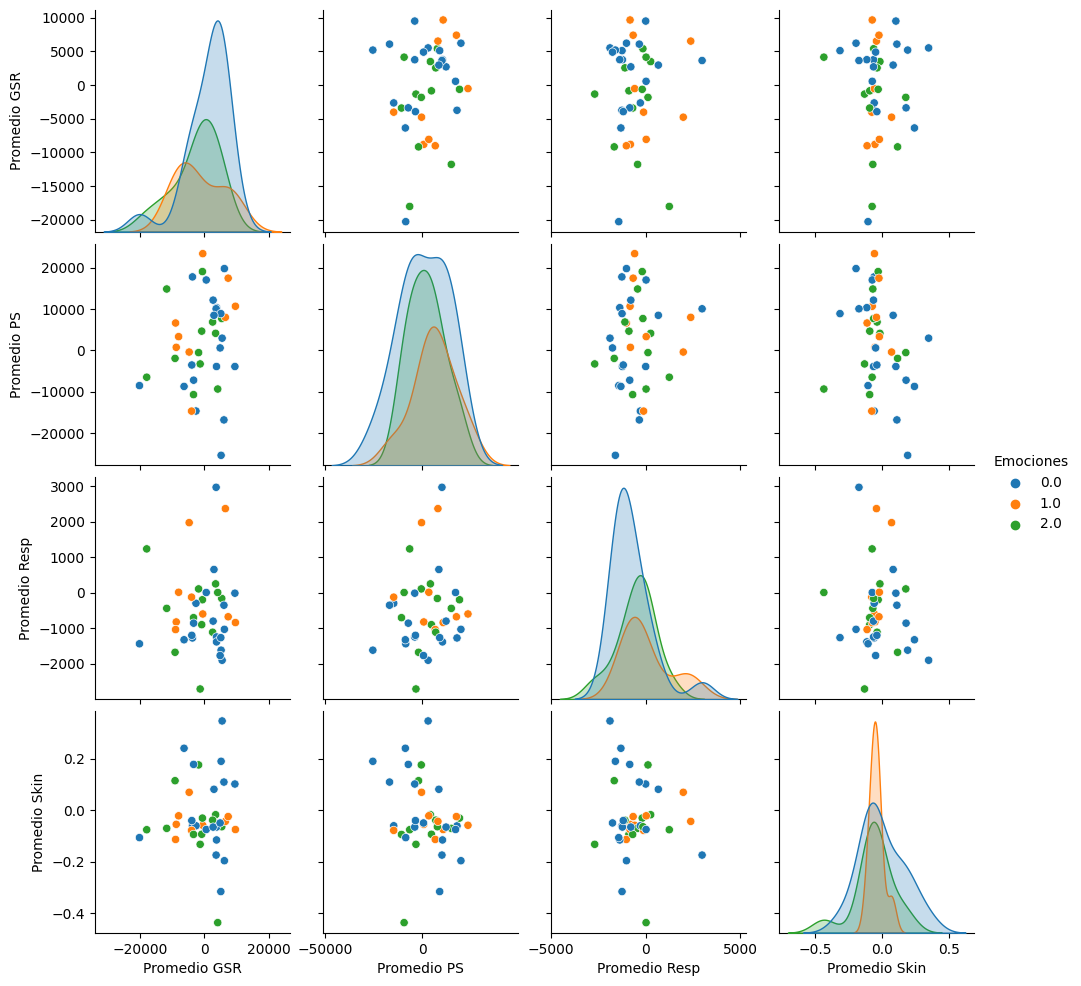

In [31]:
newDataC = dataCaracteristicas.loc[0:39, ['Promedio GSR','Promedio PS','Promedio Resp','Promedio Skin', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

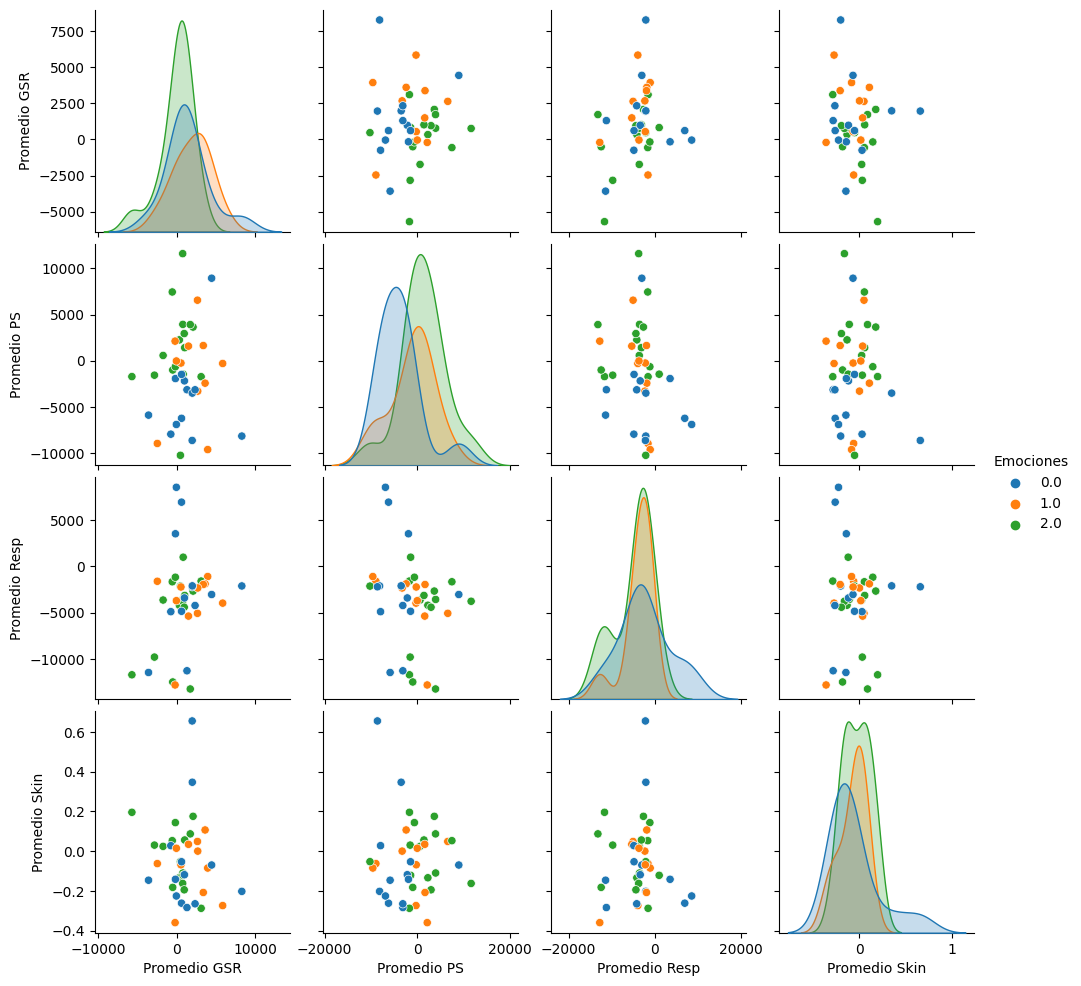

In [32]:
newDataC = dataCaracteristicas.loc[40:79, ['Promedio GSR','Promedio PS','Promedio Resp','Promedio Skin', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

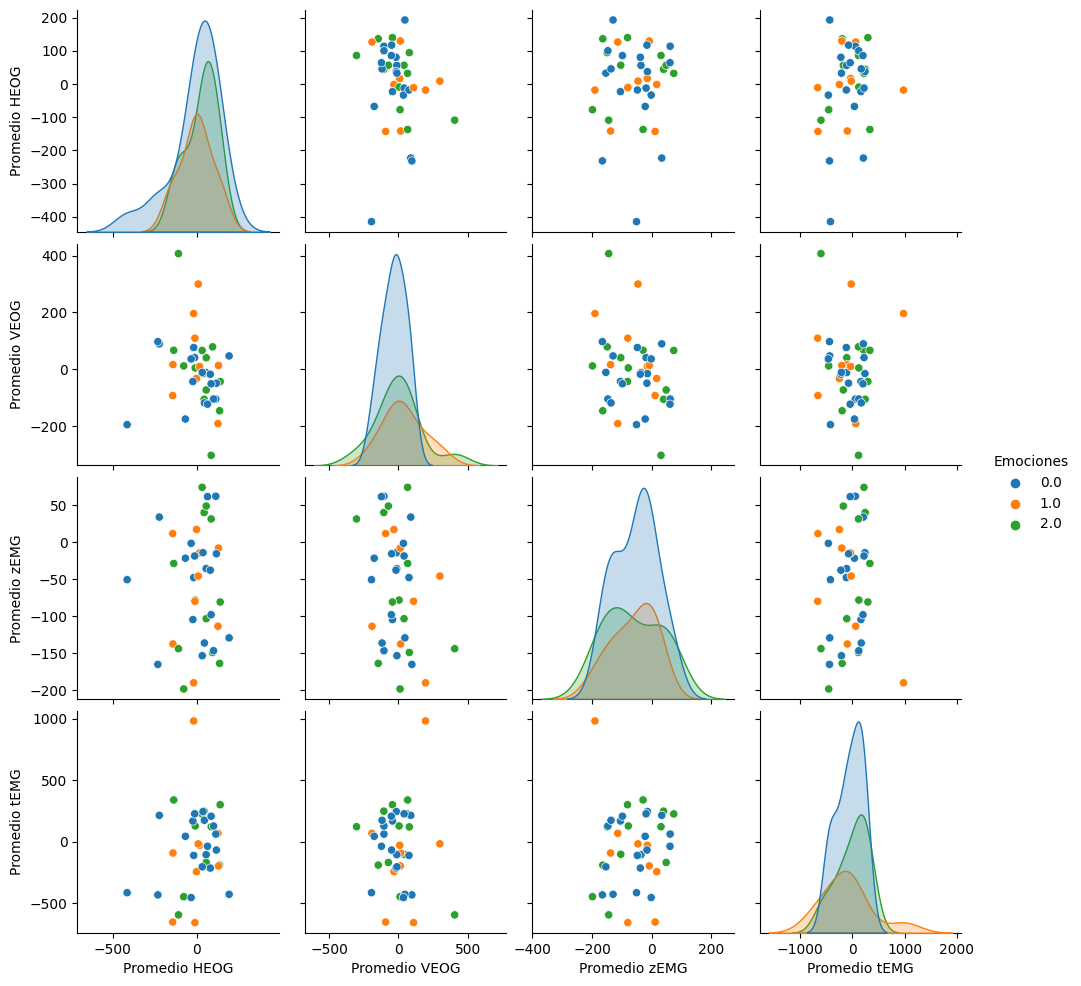

In [33]:
newDataC = dataCaracteristicas.loc[0:39, ['Promedio HEOG', 'Promedio VEOG', 'Promedio zEMG', 'Promedio tEMG', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

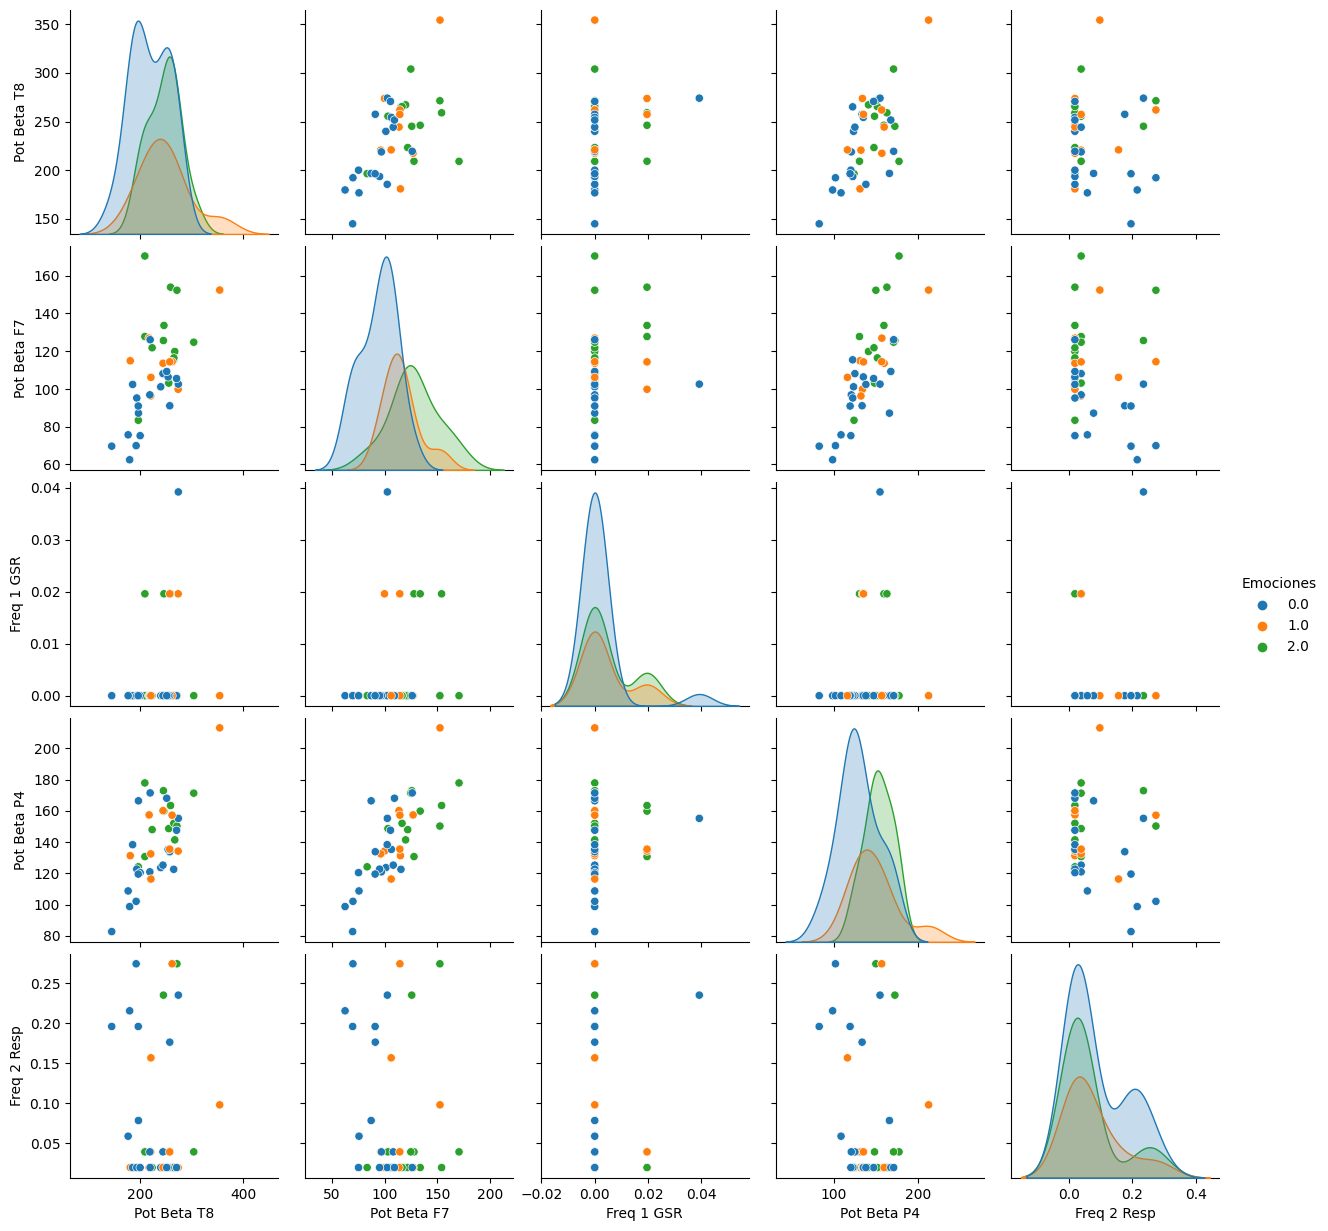

In [34]:
newDataC = dataCaracteristicas.loc[0:39, ['Pot Beta T8', 'Pot Beta F7', 'Freq 1 GSR', 'Pot Beta P4', 'Freq 2 Resp', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

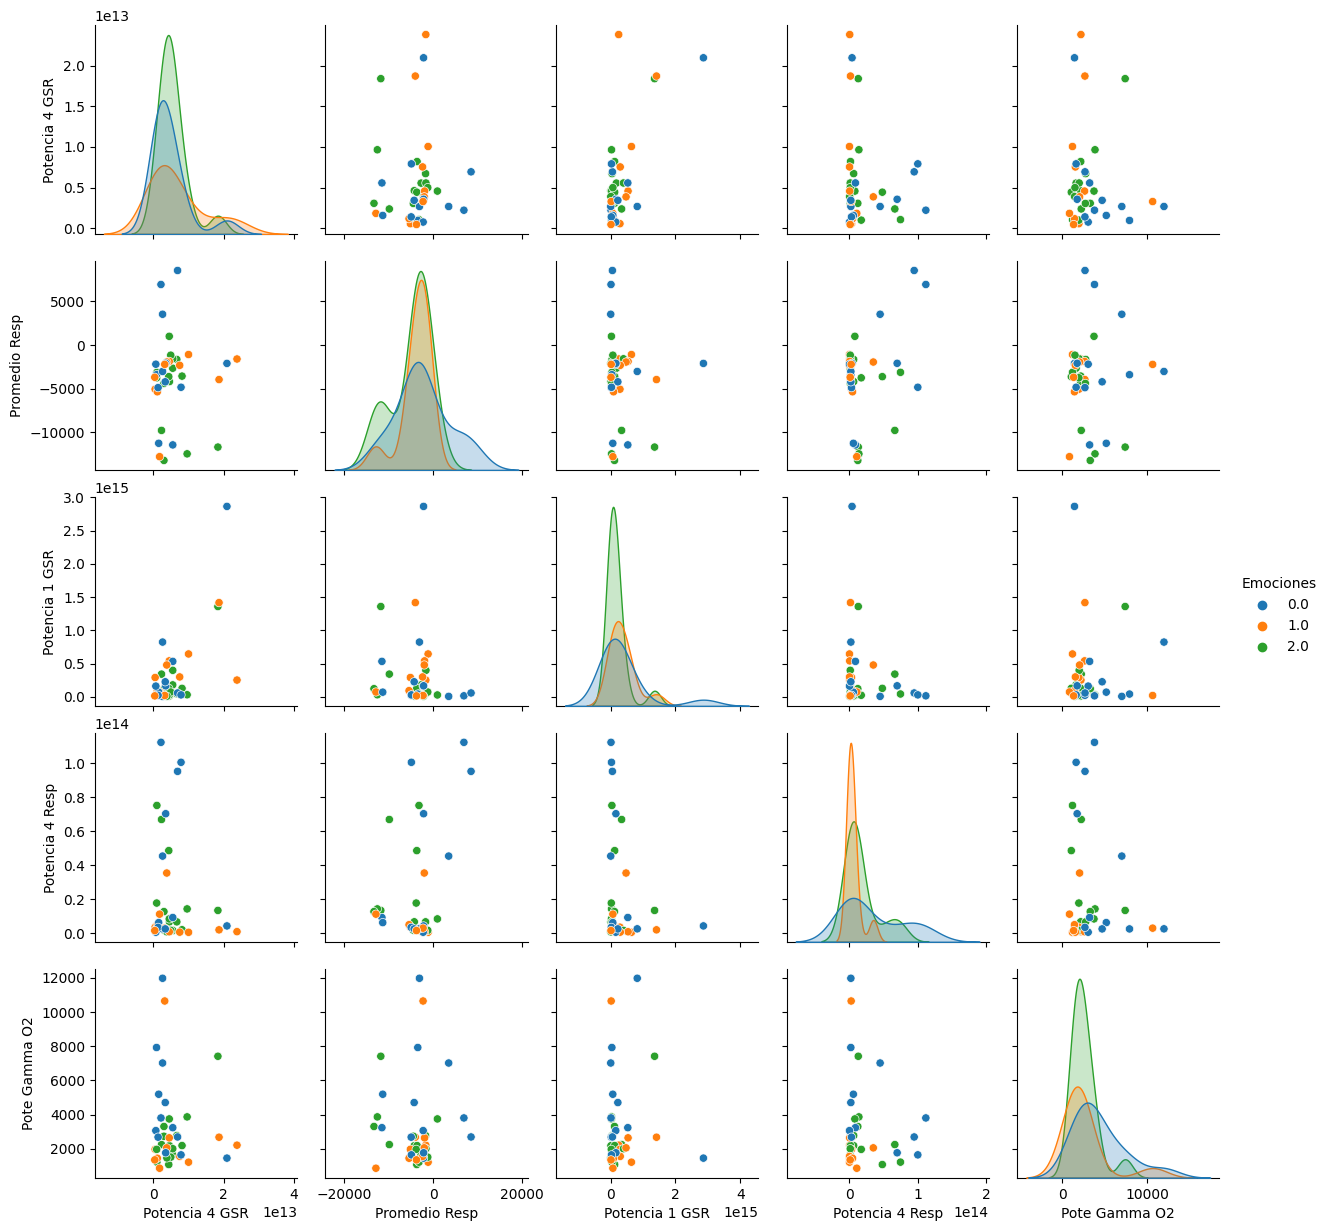

In [35]:
newDataC = dataCaracteristicas.loc[40:79, ['Potencia 4 GSR', 'Promedio Resp', 'Potencia 1 GSR', 'Potencia 4 Resp', 'Pote Gamma O2', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

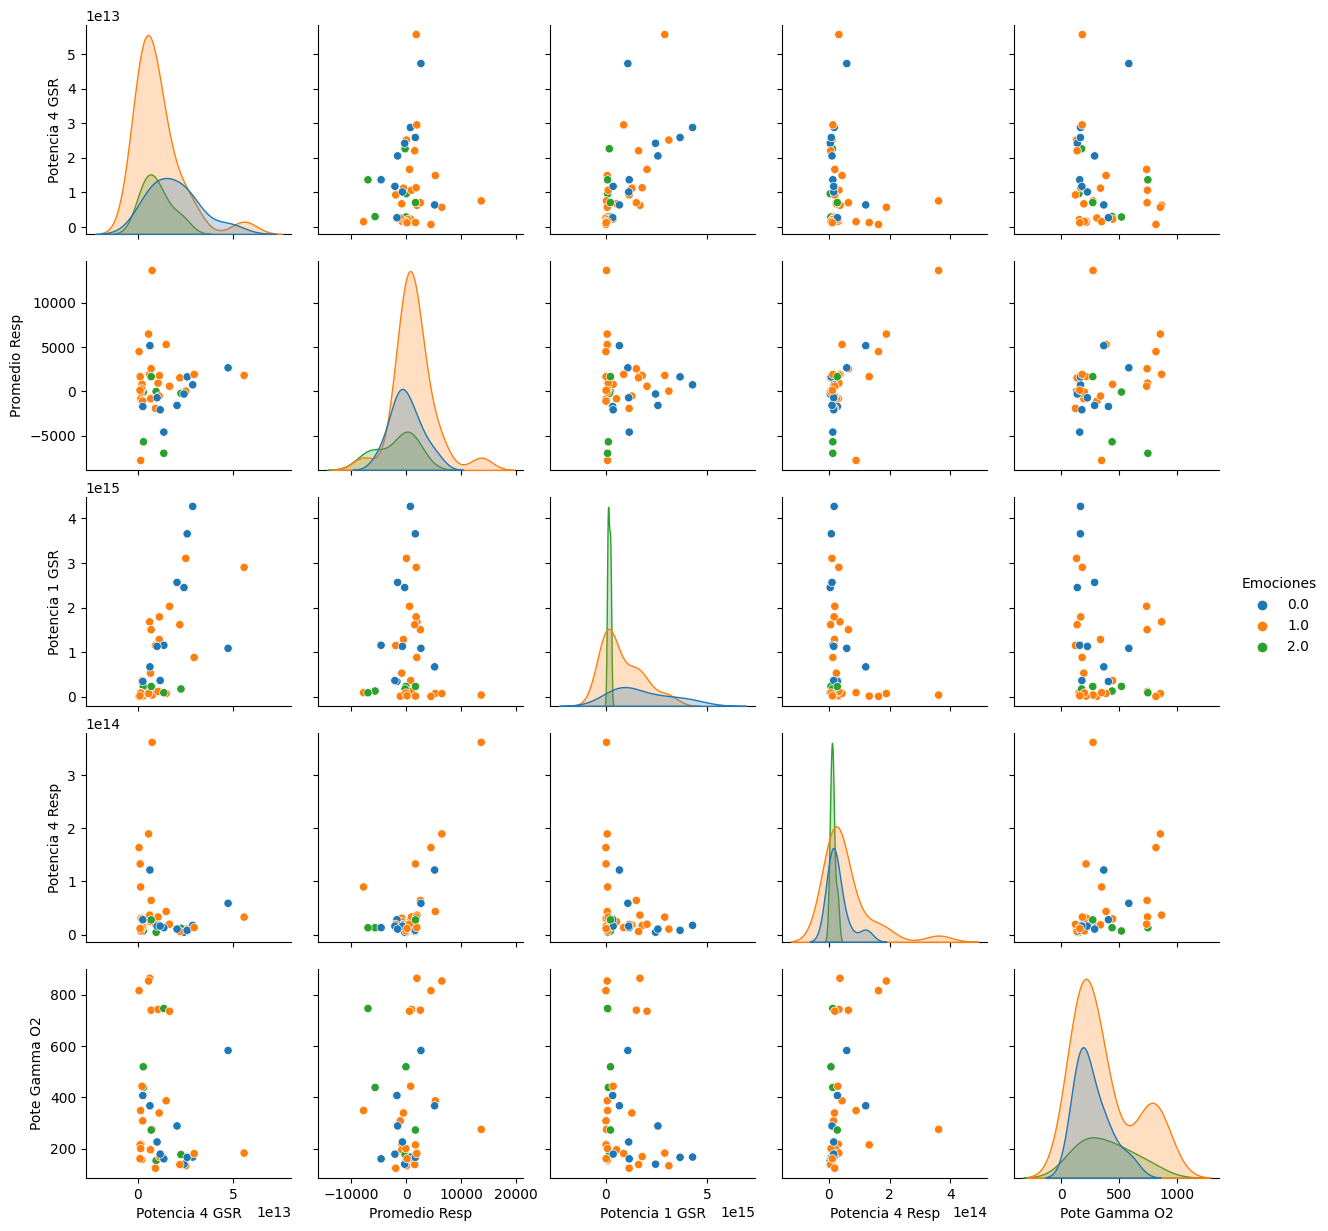

In [37]:
newDataC = dataCaracteristicas.loc[120:159, ['Potencia 4 GSR', 'Promedio Resp', 'Potencia 1 GSR', 'Potencia 4 Resp', 'Pote Gamma O2', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

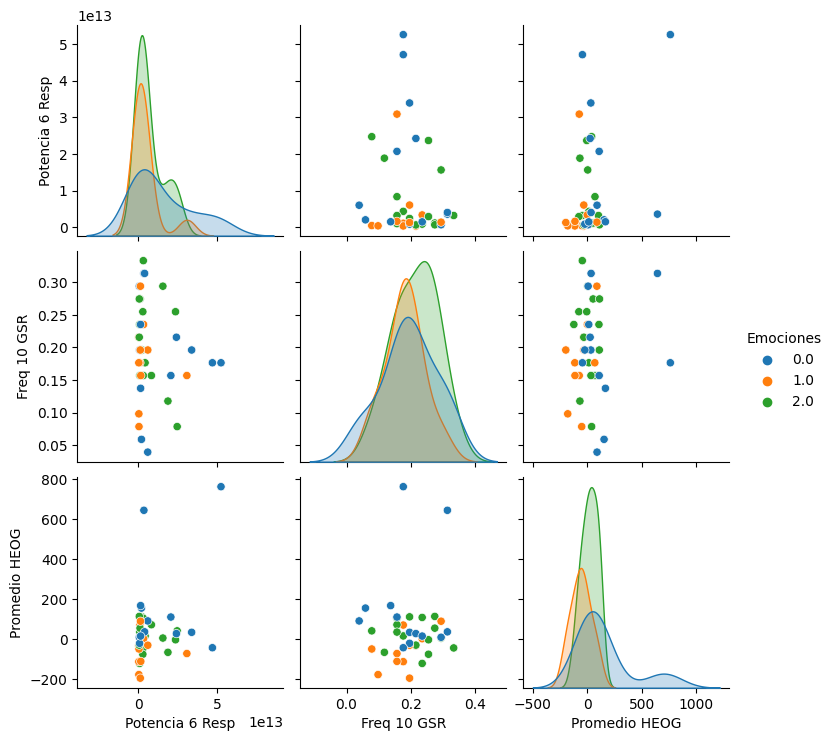

In [39]:
newDataC = dataCaracteristicas.loc[40:79, ['Potencia 6 Resp', 'Freq 10 GSR', 'Promedio HEOG', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

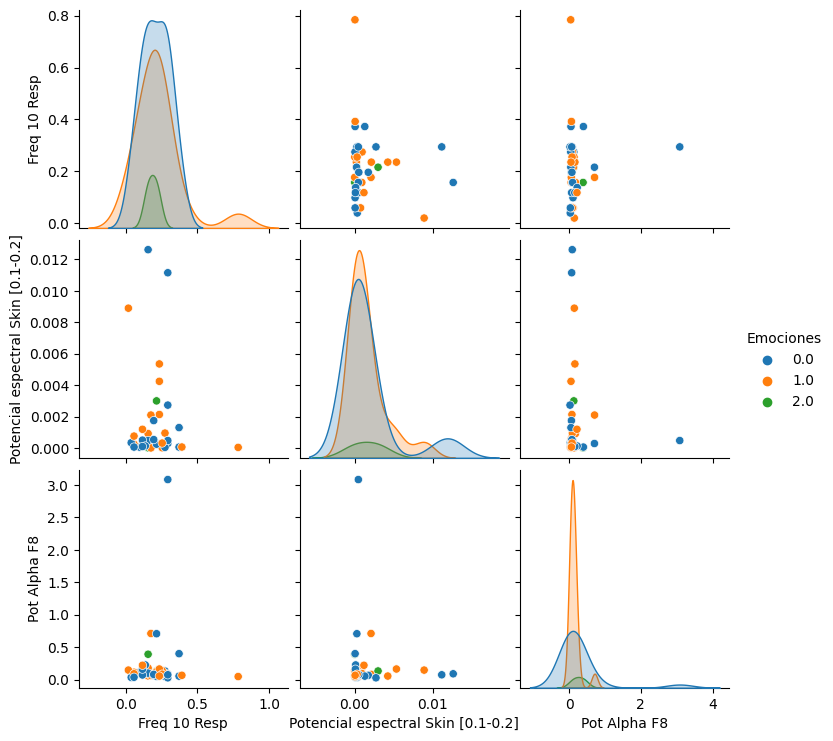

In [43]:
newDataC = dataCaracteristicas.loc[80:119, ['Freq 10 Resp', 'Potencial espectral Skin [0.1-0.2]', 'Pot Alpha F8', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

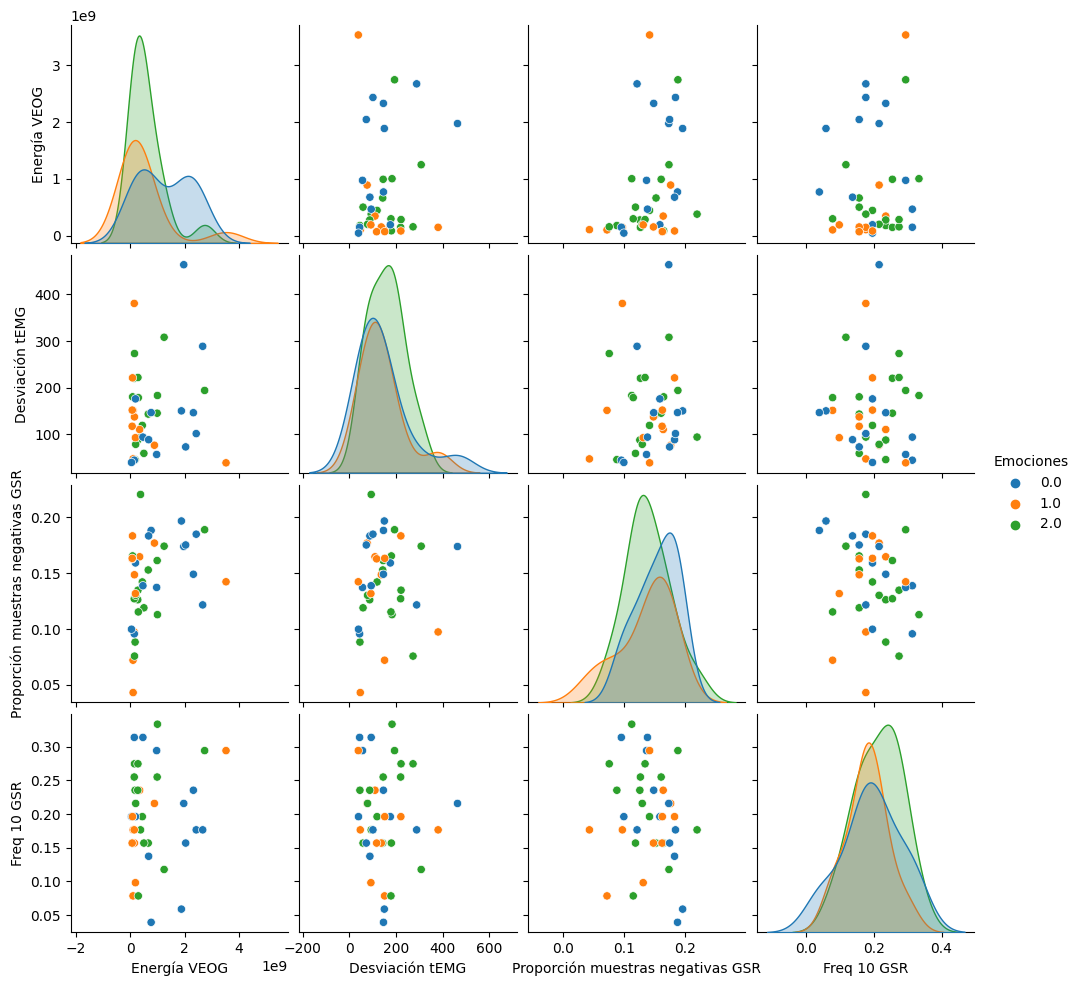

In [50]:
newDataC = dataCaracteristicas.loc[40:79, ['Energía VEOG', 'Desviación tEMG', 'Proporción muestras negativas GSR', 'Freq 10 GSR', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

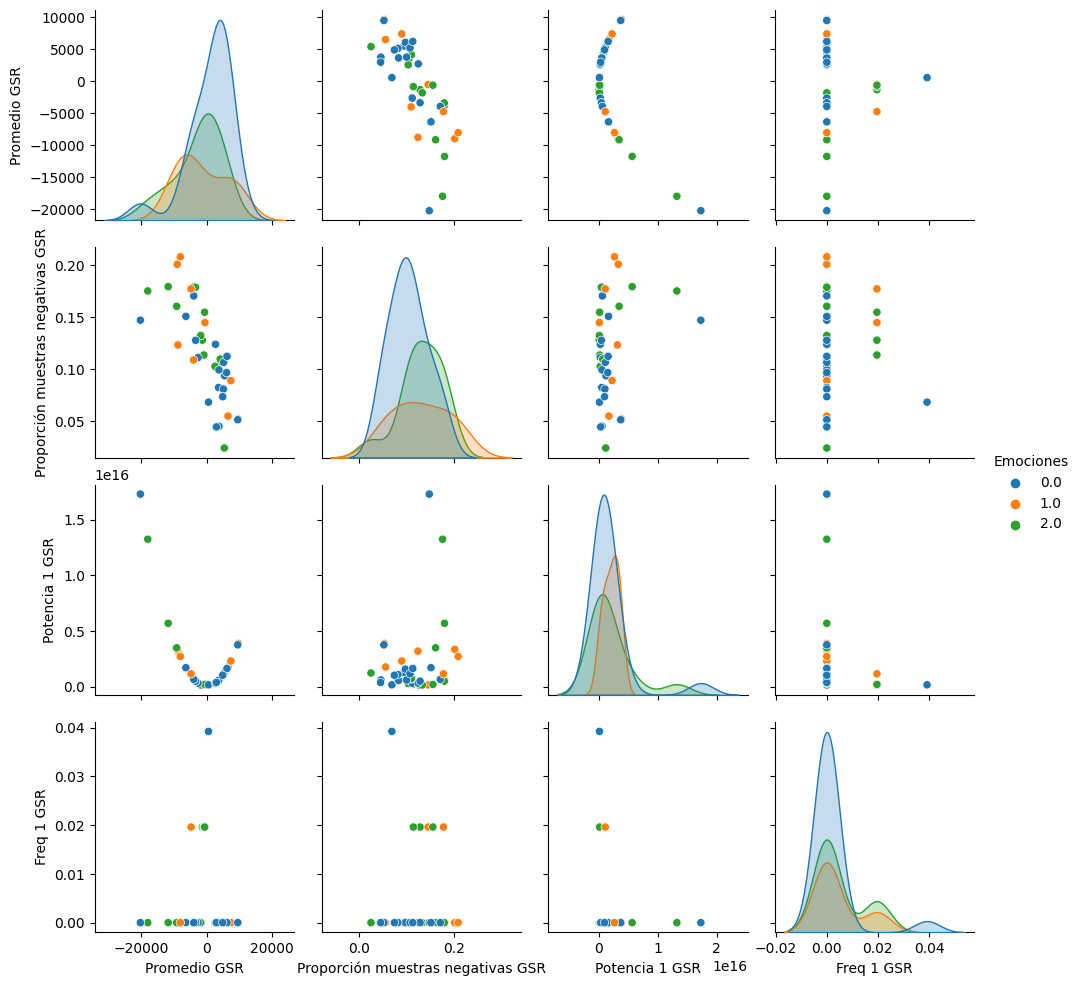

In [54]:
newDataC = dataCaracteristicas.loc[0:159, ['Promedio GSR', 'Proporción muestras negativas GSR', 'Potencia 1 GSR', 'Freq 1 GSR', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

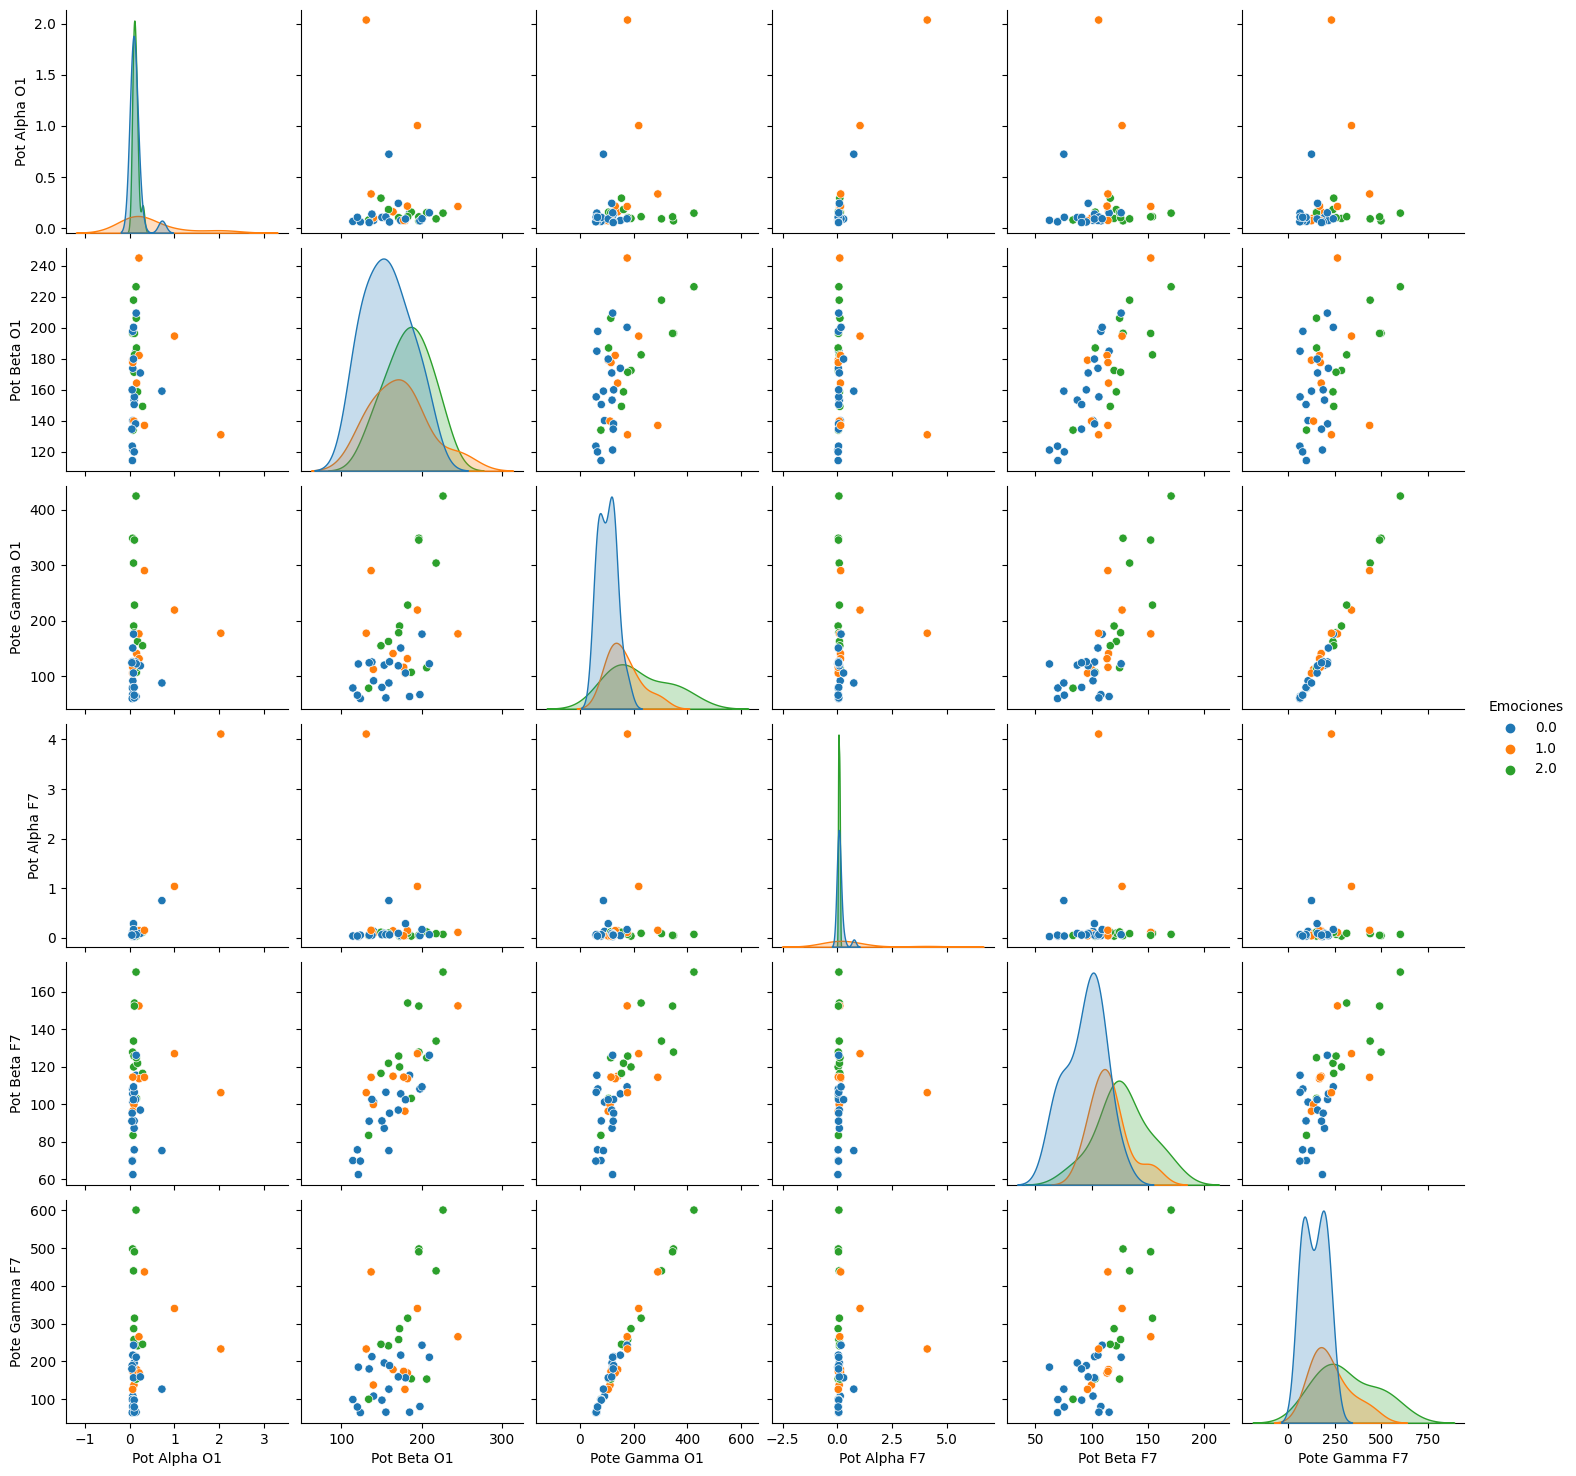

In [56]:
newDataC = dataCaracteristicas.loc[0:39, ['Pot Alpha O1', 'Pot Beta O1', 'Pote Gamma O1', 'Pot Alpha F7', 'Pot Beta F7', 'Pote Gamma F7', 'Emociones']]

sns.pairplot(newDataC, hue ='Emociones')

In [49]:
import random
aleatorio = random.sample(nombre, 4)
print(aleatorio)

['Freq 9 Resp', 'Proporción muestras negativas GSR', 'Desviación VEOG', 'Freq 5 Resp']
